In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from astropy.cosmology import Planck15
from astropy import units as u

import sys 
sys.path.append('/Users/aleksandra/Desktop/Research/unWISE_dictonaries/')
from green_dict import *
from red_dict import *
from blue_dict import *

#matplotlib.use('pdf')
font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

# To-do:
-units 

flux cut

params 

In [2]:
nu_list = 90,217,353
nu_list_str = '90,217,353'

In [3]:
color = "green"

In [4]:
if color=="blue":
    pdict = blue_pdict
if color=="green":
    pdict = green_pdict
if color=="red":
    pdict = red_pdict  
    
pdict['galaxy_sample_id']
#pdict

'green'

In [5]:
path_to_files = '/Users/aleksandra/software/class_sz/sz_auxiliary_files/'

TCMB = 2.726 #Kelvin
TCMB_uK = 2.726e6 #micro-Kelvin


hplanck=6.626068e-34 #MKS
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
m_elec = 510.999 #keV

L0_websky = 4.461102571695613e-07

common_settings = {
                   'mass function' : 'T08', 
                   'delta for cib' : '200m',
                   'hm_consistency': 0,
                   'concentration parameter': 'D08',  # Duffy et al 2008 
            'z_min' : 0.07,
        'z_max' : 6,
        'ell_min': 10.,
        'ell_max': 1e4,
        'dlogell':0.2,
}

# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1
}


# parameters used by Fiona and Mat
cib_params = {
       'hm_consistency': 0,
       'Redshift evolution of dust temperature' :  0.36,
       'Dust temperature today in Kelvins' : 24.4,
       'Emissivity index of sed' : 1.75,
       'Power law index of SED at high frequency' : 1.7,
       'Redshift evolution of L − M normalisation' : 3.6,
       'Most efficient halo mass in Msun' : 10.**12.6,
       'Normalisation of L − M relation in [Jy MPc2/Msun]' : 6.4e-8,
       'Size of of halo masses sourcing CIB emission' : 0.5,

        # M_min_HOD is the threshold above which nc = 1:
        'M_min_HOD' : 10.**10,

        'M_min' : 1e10*websky_cosmo['h'],
        'M_max' : 1e16*websky_cosmo['h'],
        'z_min' : 0.07,
        'z_max' : 6,
        'ell_min': 10.,
        'ell_max': 1e4,
        'dlogell':0.2,
    
    
}
tsz_params ={

       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'units for tSZ spectrum': 'dimensionless',
       'n_ell_pressure_profile' : 100,
       'n_m_pressure_profile' : 100,
       'n_z_pressure_profile' : 100,
       'x_outSZ': 4.,
       'truncate_wrt_rvir':0,
       'pressure_profile_epsrel':1e-3,
       'pressure_profile_epsabs':1e-40,

}

# ~ model 2 of https://arxiv.org/pdf/1208.5049.pdf (Table 5)
# more exactly:
# shang_zplat  = 2.0
# shang_Td     = 20.7
# shang_beta   = 1.6
# shang_eta    = 1.28
# shang_alpha  = 0.2
# shang_Mpeak  = 10.**12.3
# shang_sigmaM = 0.3

# centrals is Ncen = 1 for all halos with mass bigger than websky's m_min
# subhalo mass function is eq. 3.9 of the websky paper 
# it is F. Jiang and F. C. van den Bosch, Generating merger trees for dark matter haloes: a comparison of
# methods, MNRAS 440 (2014) 193 [1311.5225].
websky_cib_params = {
       
       'Redshift evolution of dust temperature' :  0.2,
       'Dust temperature today in Kelvins' : 20.7,
       'Emissivity index of sed' : 1.6,
       'Power law index of SED at high frequency' : 1.7, # not given in WebSky paper, actually not relevant since we dont use high freqs in websky.
       'Redshift evolution of L − M normalisation' : 1.28,
       'Most efficient halo mass in Msun' : 10.**12.3,
       'Normalisation of L − M relation in [Jy MPc2/Msun]' : 1e-7,  # not given in WebSky paper
       'Size of of halo masses sourcing CIB emission' : 0.3,
       'z_plateau_cib' : 2.,

        # M_min_HOD is the threshold above which nc = 1:
        # 'M_min_HOD' : 10.**10.1, # not used here
        'use_nc_1_for_all_halos_cib_HOD': 1,
    
        'sub_halo_mass_function' : 'JvdB14',
        'M_min_subhalo_in_Msun' : 1e11,
        'use_redshift_dependent_M_min': 1,
        #'full_path_to_redshift_dependent_M_min':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/websky_halo_mass_completion_z_Mmin_in_Msun_over_h.txt',
        #'M_min' : 1e10*websky_cosmo['h'], # not used
        'M_max' : 1e16*websky_cosmo['h'],
        'z_min' : 5e-3,
        'z_max' : 4.6,
        'ell_min': 10.,
        'ell_max': 1e4,
        'dlogell':0.2,
    
       'cib_frequency_list_num' : 1,
       'cib_frequency_list_in_GHz' : '353',  
    
        #for the monopole computation:
        'freq_min': 2e1,
        'freq_max': 4e3,
        'dlogfreq' : 0.05,

# table 1 of https://arxiv.org/pdf/1309.0382.pdf
#1: freq GHz 2: Flux cut mJy
# 100 - 400
# 143 - 350
# 217 - 225
# 353 - 315
# 545 - 350
# 857 - 710
# 3000  - 1000
#cib_Snu_1 = 315.
#cib_Snu_2 = 315.
        #'cib_Snu_cutoff_list [mJy]':'315',
        'has_cib_flux_cut': 0
}



# Frequency-independent

## CMB

In [6]:
common_settings_cmb = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   # other output and precision parameters
                   'l_max_scalars':10000, 

}

In [7]:
M = Class()
M.set(common_settings_cmb)
M.compute()
cl_tot = M.raw_cl(10000)
cl_lensed = M.lensed_cl(10000)
ell = cl_tot['ell']
M.struct_cleanup()  # clean output
M.empty()           # clean input


factor = TCMB**2 * ell*(ell+1.)/2./np.pi

In [8]:
# noise 
ell_noise, cl_noise = np.loadtxt("/Users/aleksandra/Desktop/noise_curves_from_kSZ2X/nl_advact_20uK_1p5arcmin_uK2_170422.txt").T

## kSZ

In [9]:
# battaglia 12 kSZ theory computation. Patchy is before reionization, the other after reionization; should add these two
CellkSZhomog = np.loadtxt('/Users/aleksandra/Desktop/Research/ACTxDES/kSZ_filter/kSZ_theory_data/FBN_kSZ_PS.d.txt')
CellkSZpatchy = np.loadtxt('/Users/aleksandra/Desktop/Research/ACTxDES/kSZ_filter/kSZ_theory_data/FBN_kSZ_PS_patchy.d.txt')

# get rid of ell*(ell+1)/2pi factors  
ell_theory_battaglia = CellkSZhomog[:,0]
dl_kSZ_theory_battaglia = CellkSZhomog[:,1] + CellkSZpatchy[:,1]
cl_kSZ_theory_battaglia = (CellkSZhomog[:,1] + CellkSZpatchy[:,1]) * 2.0*np.pi/(ell_theory_battaglia)/(ell_theory_battaglia+1.0)


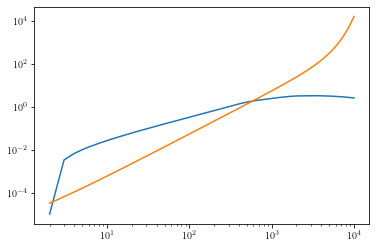

In [10]:
plt.plot(ell_theory_battaglia , dl_kSZ_theory_battaglia)
plt.plot(ell_noise , ell_noise *(ell_noise +1)*cl_noise/2/np.pi)
plt.yscale("log")
plt.xscale("log")

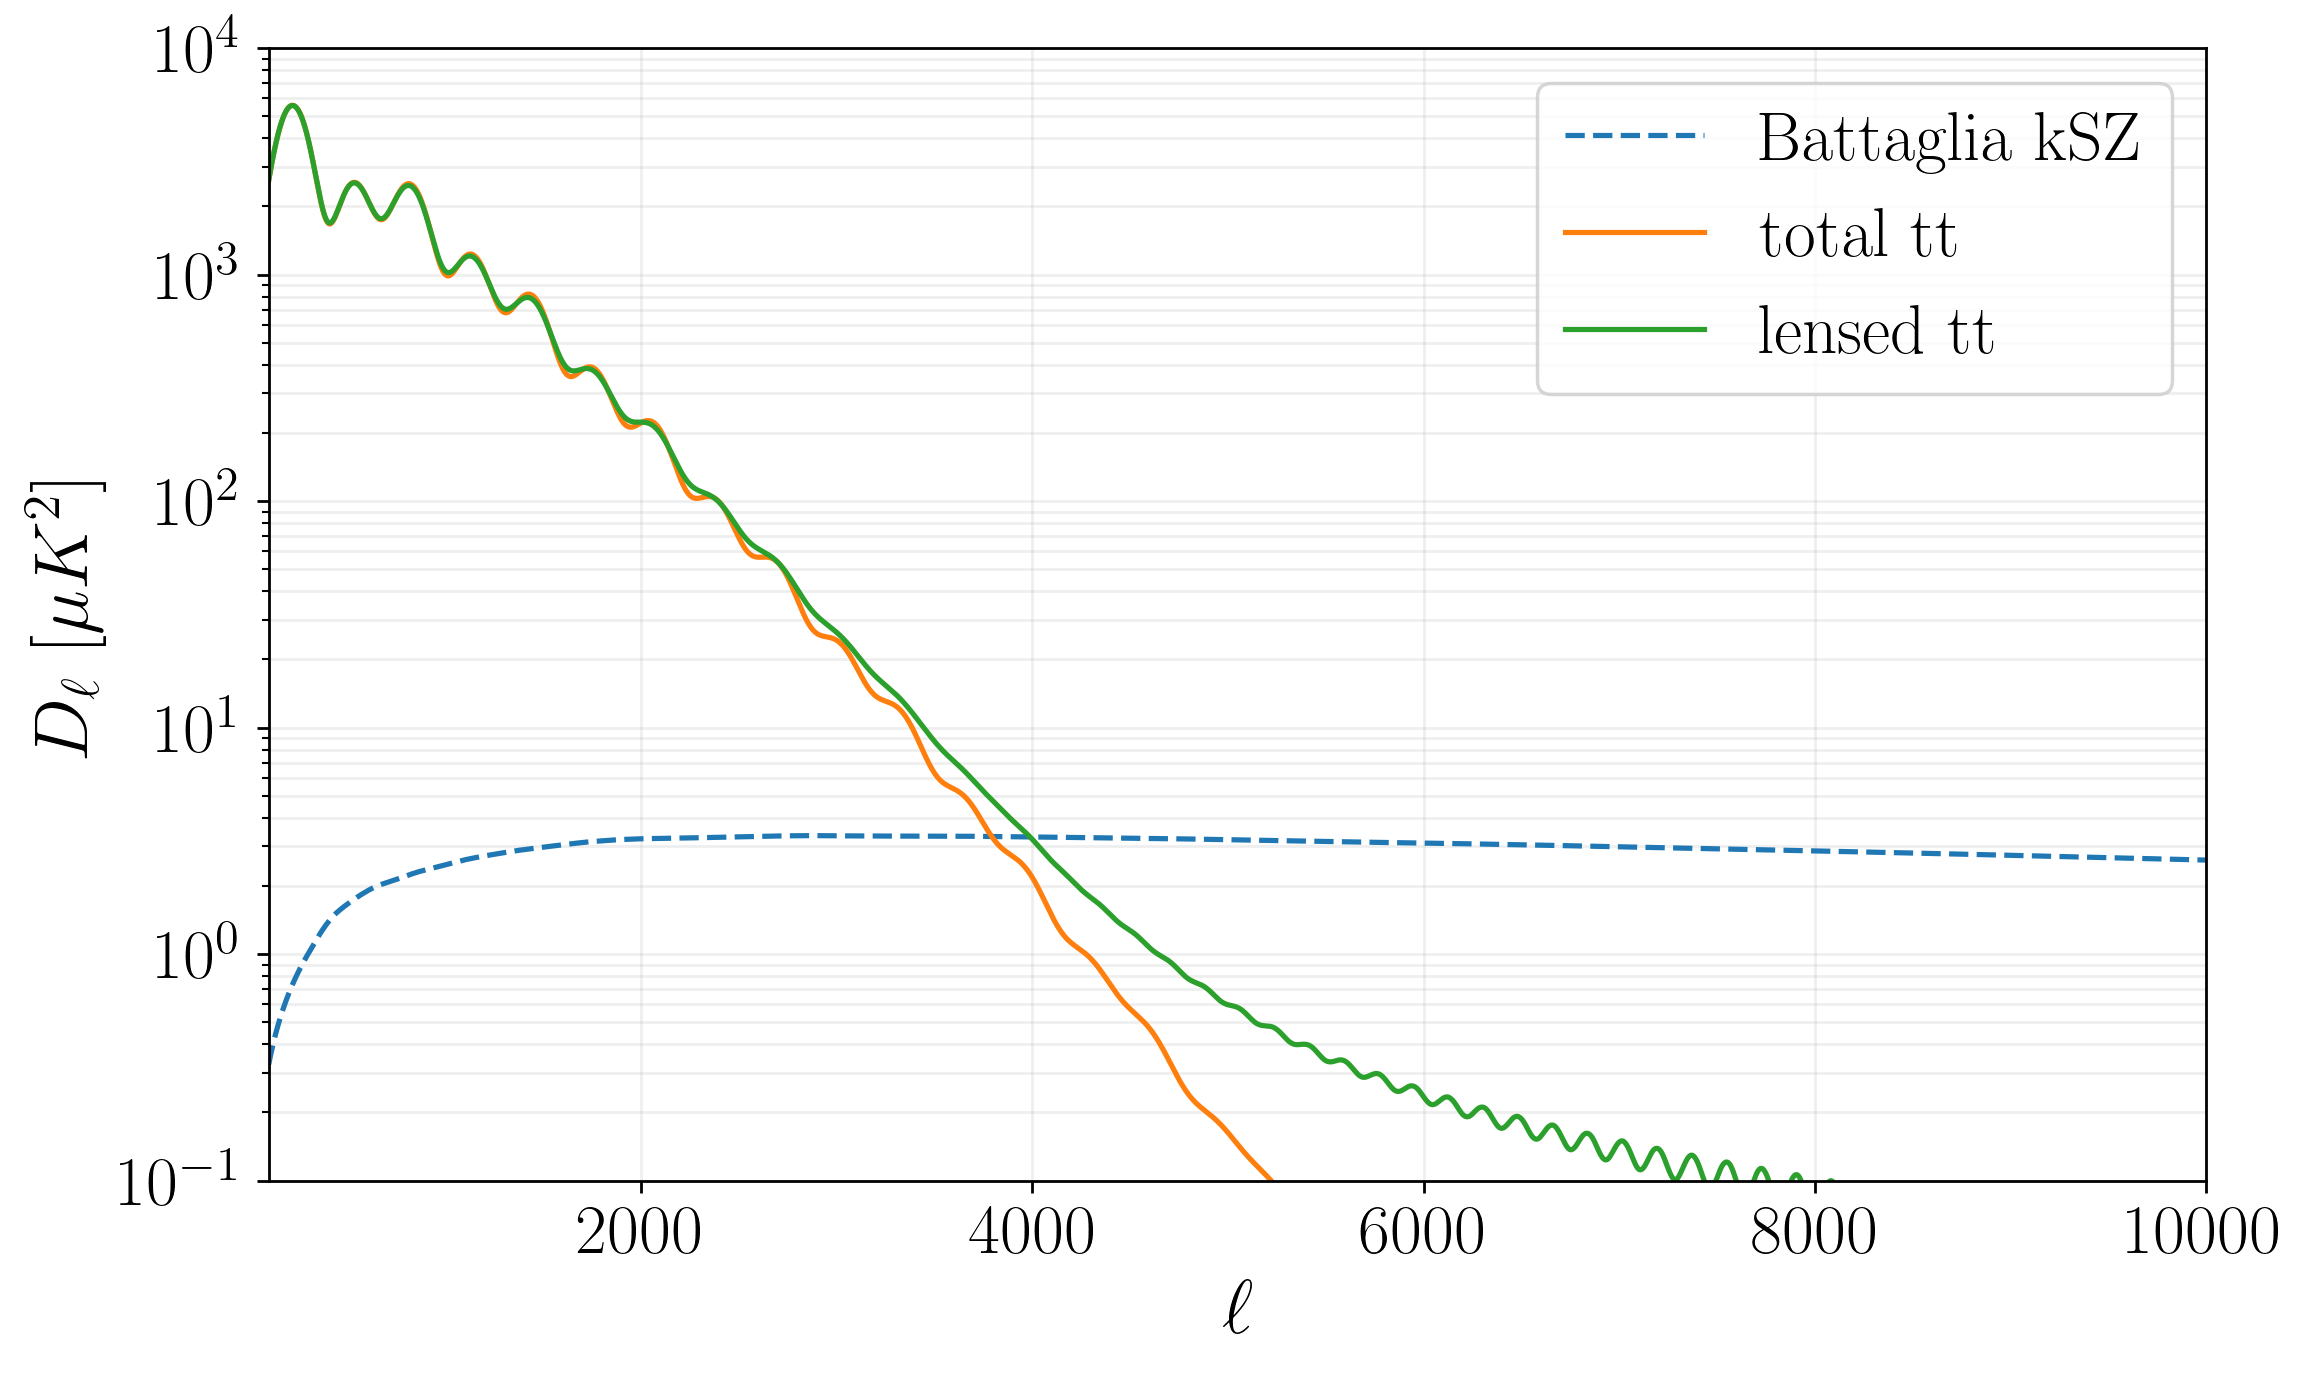

In [11]:
plt.figure(figsize=(10,6), dpi=250)

plt.plot(ell_theory_battaglia, dl_kSZ_theory_battaglia,"--", label = "Battaglia kSZ")
plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total tt')
plt.plot(ell, 1.e12*factor*cl_lensed['tt'],label='lensed tt')

plt.yscale("log")
#plt.xscale("log")
plt.xlim(100,1e4)
plt.ylim(1e-1,1e4)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('$\ell$',fontsize=22)
plt.ylabel(r'$D_\ell$  [$\mu K^2$]',fontsize=22)
plt.grid(which='both',alpha=0.2)
plt.legend(fontsize=20)


# Frequency-dependent

## tSZ x CIB

In [12]:
M = Class()
M.set({'output':'cib_cib_1h,cib_cib_2h,tSZ_cib_1h,tSZ_cib_2h,tSZ_1h,tSZ_2h'})
M.set(common_settings)
M.set(cib_params)
M.set(tsz_params)

M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
       
       'cib_frequency_list_num' : len(nu_list),
       'cib_frequency_list_in_GHz' : nu_list_str,  
      })
M.compute()

cl_cib_cib = M.cl_cib_cib()
cl_tsz_cib = M.cl_tSZ_cib()
cl_sz = M.cl_sz()

with flux cut:

In [13]:

# M = Class()
# M.set({'output':'cib_monopole,cib_cib_1h,cib_cib_2h,tSZ_cib_1h,tSZ_cib_2h'})
# M.set(common_settings)
# M.set(websky_cosmo)
# M.set(websky_cib_params)
# M.set(tsz_params)

# M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
       
#        'cib_frequency_list_num' : 3,
#        'cib_frequency_list_in_GHz' : nu_list_str,  
# # table 1 of https://arxiv.org/pdf/1309.0382.pdf
# #1: freq GHz 2: Flux cut mJy
# # 100 - 400
# # 143 - 350
# # 217 - 225
# # 353 - 315
# # 545 - 350
# # 857 - 710
# # 3000  - 1000
#         'cib_Snu_cutoff_list [mJy]':'315,350,225',
#         'has_cib_flux_cut': 1
#       })
# M.compute()
# cl_cib_cib_flux_cut = M.cl_cib_cib()
# cib_monopole_flux_cut = M.cib_monopole()
# cl_tsz_cib_flux_cut = M.cl_tSZ_cib()

In [14]:
# function used to compute tsz at nu (inside class-sz)
def cl_sz_at_nu_in_GHz_in_microK2(self,nu_in_GHz):
    frequency_in_Hz = nu_in_GHz*1e9
    T_cmb = self.T_cmb()
    _h_P_=6.62606896e-34
    _k_B_=1.3806504e-23
    Tcmb_gNU = T_cmb*((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))/2.))-4.)
    r = {}
    r['ell'] = np.asarray(self.cl_sz()['ell'])
    r['1h'] = np.asarray(self.cl_sz()['1h'])*Tcmb_gNU**2.
    r['2h'] = np.asarray(self.cl_sz()['2h'])*Tcmb_gNU**2.
    return r

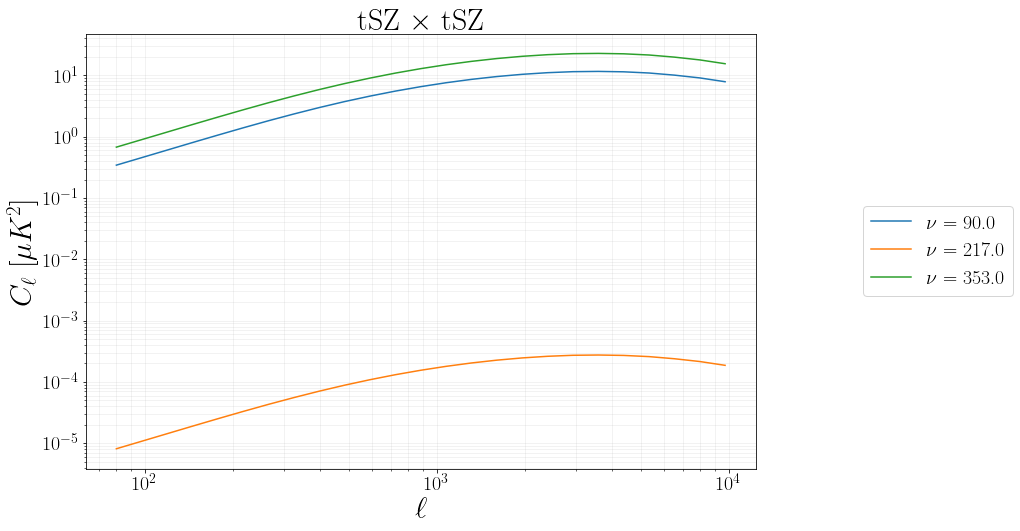

In [59]:
plt.figure(figsize=(12,8))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel(r'$C_\ell$  [$\mu K^2$]',fontsize=30)
plt.title(r'tSZ $\times$ tSZ', fontsize=30)
plt.grid(which='both',alpha=0.2)


cl_sz_at_nu = np.vectorize(M.cl_sz_at_nu_in_GHz_in_microK2)
cls_tSZ = cl_sz_at_nu(np.asarray(nu_list))

for (i,nu) in enumerate(nu_list):
    plt.loglog(cls_tSZ[i]['ell'],cls_tSZ[i]['1h']+cls_tSZ[i]['2h'],label=r'$\nu$ = %.1f'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB 

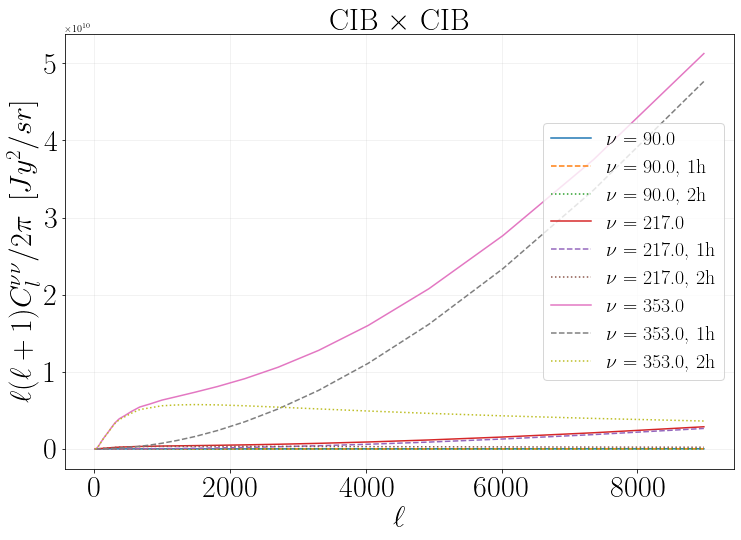

In [16]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\nu \nu} / 2 \pi \,\,\, [Jy^2/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)


for (i,nu) in enumerate(nu_list):
    #CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls

    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_1h + dls_cib_2h, label=r'$\nu$ = %.1f'%(nu))
    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_1h,"--",  label=r'$\nu$ = %.1f, 1h'%(nu))
    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_2h, ":", label=r'$\nu$ = %.1f, 2h'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

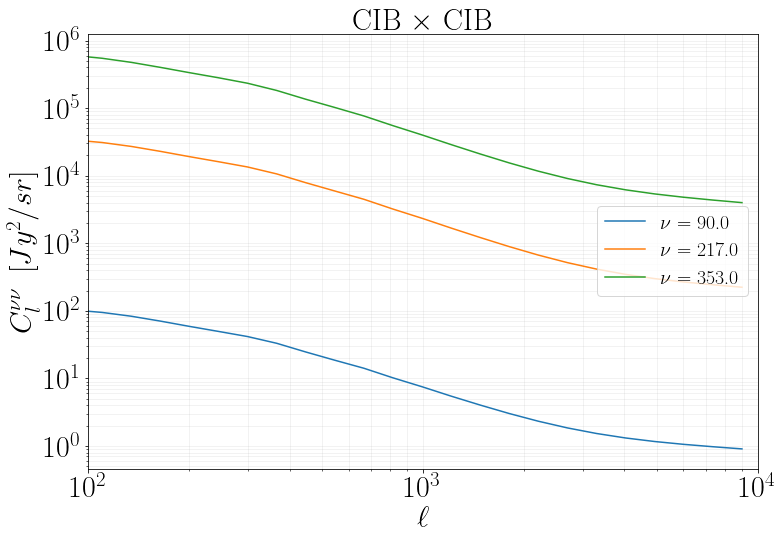

In [17]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\nu \nu} \,\,\, [Jy^2/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(100, 10000)

ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    #CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])/cls_to_dls
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])/cls_to_dls

    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_1h + dls_cib_2h, label=r'$\nu$ = %.1f'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

### not reproducing Fig 3 in Fiona/Mat but params different ?


## tSZ x CIB

In [18]:
# M = Class()
# M.set({'output':'tSZ_cib_1h,tSZ_cib_2h'})
# M.set(tsz_params)
# M.set(common_settings)
# M.set(cib_params)


# M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
       
#        'cib_frequency_list_num' : len(nu_list),
#        'cib_frequency_list_in_GHz' : nu_list_str,   
#       })
# M.compute()

# cl_tsz_cib = M.cl_tSZ_cib()

In [19]:
cl_tsz_cib

{'90': {'ell': [10.000000000000002,
   12.214027581601703,
   14.918246976412705,
   18.221188003905095,
   22.255409284924678,
   27.182818284590457,
   33.20116922736549,
   40.55199966844677,
   49.53032424395116,
   60.496474644129464,
   73.89056098930652,
   90.25013499434124,
   110.23176380641608,
   134.637380350017,
   164.4464677109705,
   200.85536923187672,
   245.32530197109358,
   299.6410004739703,
   365.9823444367801,
   447.01184493300826,
   545.9815003314425,
   666.8633104092517,
   814.5086866496816,
   994.8431564193388,
   1215.10417518735,
   1484.1315910257663,
   1812.7224187515126,
   2214.0641620418724,
   2704.264074261528,
   3302.9955990964927,
   4034.2879349273558,
   4927.490410932564,
   6018.450378720819,
   7350.951892419735,
   8978.472916504194],
  '1h': [0.009598253669090452,
   0.015597950706390544,
   0.025189001304731836,
   0.0404876312520539,
   0.06481736258112457,
   0.10333986828719507,
   0.16394149209743664,
   0.2584149716464777,
   

In [20]:
# is it in y units??? or already multiplied by frequency function 

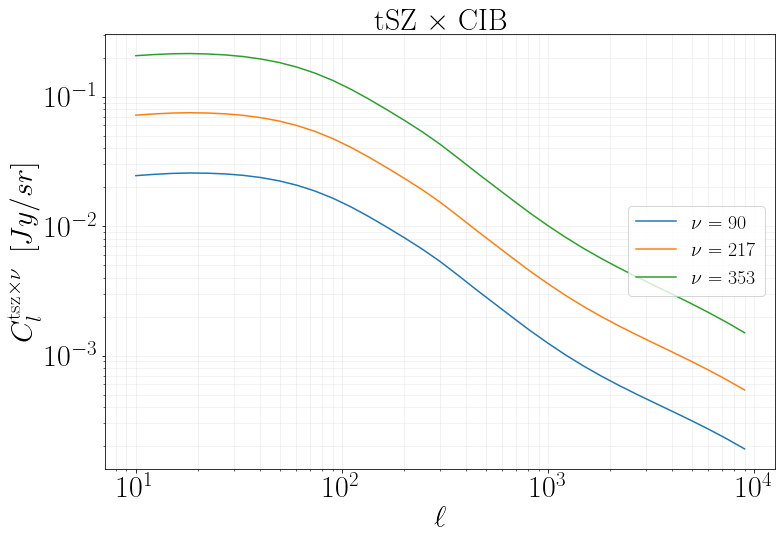

In [21]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\rm{tsz \times \nu}} \,\,\, [Jy/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'tSZ $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'-',label=r'$\nu$ = %.1i'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

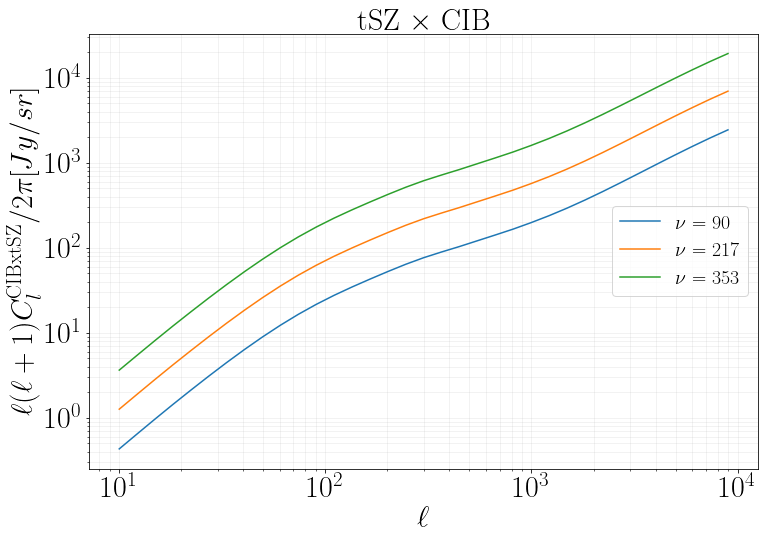

In [22]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{CIB}xtSZ} / 2 \pi [Jy/sr]$", fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'tSZ $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h'])),'-',label=r'$\nu$ = %.1i'%(nu))

plt.legend(loc='right',  fontsize=20)    
  


## tSZ x g 

In [23]:
def cl_tszxg_at_nu_in_GHz_in_microK2(nu_in_GHz):
        frequency_in_Hz = nu_in_GHz*1e9
        T_cmb = 2.726 #Kelvin
        _h_P_=6.62606896e-34
        _k_B_=1.3806504e-23
        Tcmb_gNU = T_cmb*((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))/2.))-4.)
        
        M = Class()
        M.set(pdict)
        M.set(common_settings)
        M.set(tsz_params)
        M.set({
            'output':'tSZ_gal_1h, tSZ_gal_2h',
        })        
        M.compute()
        cl_yg = M.cl_yg()
        print("Tcmb_gNU=", Tcmb_gNU)
        print("for", nu_in_GHz, "GHz")
        r = {}
        r['ell'] = np.asarray(cl_yg['ell'])
        r['1h'] = np.asarray(cl_yg['1h'])*Tcmb_gNU
        r['2h'] = np.asarray(cl_yg['2h'])*Tcmb_gNU
        return r


In [24]:
cl_tSZxg_at_nu = np.vectorize(cl_tszxg_at_nu_in_GHz_in_microK2)
cls_tSZxg = cl_tSZxg_at_nu(np.asarray(nu_list))

Tcmb_gNU= -4.356394063132702
for 90 GHz
Tcmb_gNU= -4.356394063132702
for 90 GHz
Tcmb_gNU= -0.02286752641387193
for 217 GHz
Tcmb_gNU= 6.105201719492976
for 353 GHz


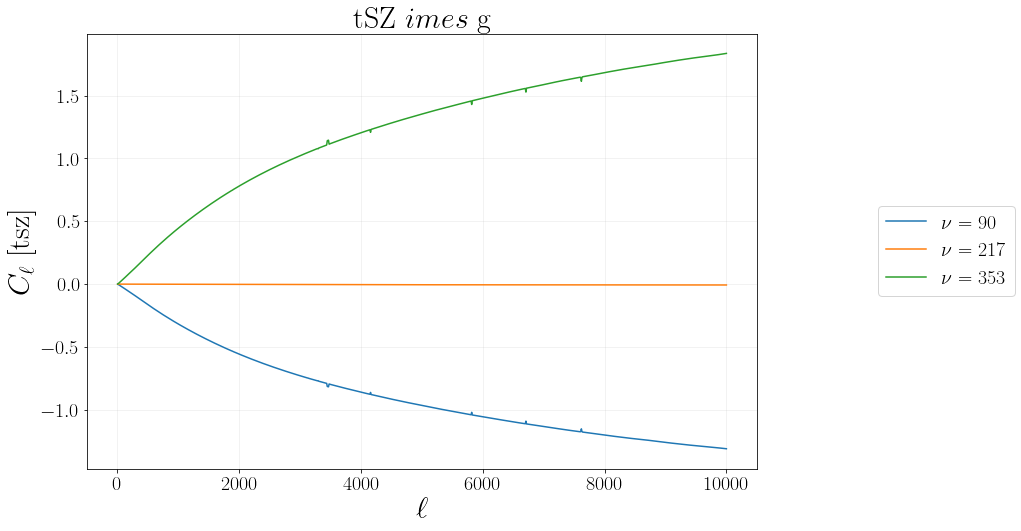

In [25]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{tSZ} / 2 \pi \,\,\, [\mu K^2]$")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel(r'$C_\ell$  [tsz]',fontsize=30)
plt.title(r'tSZ $\times$ g', fontsize=30)
plt.grid(which='both',alpha=0.2)


for (i,nu) in enumerate(nu_list):
    plt.plot(cls_tSZxg[i]['ell'],cls_tSZxg[i]['1h']+cls_tSZxg[i]['2h'],'-',label=r'$\nu$ = %.1i'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB x g 

In [26]:
M = Class()
M.set({'output':'gal_cib_1h,gal_cib_2h'})
M.set(pdict)
M.set(common_settings)
M.set(cib_params)


M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
        'Redshift evolution of dust temperature' :  0.36,
       'Dust temperature today in Kelvins' : 24.4,
       'Emissivity index of sed' : 1.75,
       'Power law index of SED at high frequency' : 1.7,
       'Redshift evolution of L − M normalisation' : 3.6,
       'Most efficient halo mass in Msun' : 10.**12.6,
     #  'Normalisation of L − M relation in [Jy MPc2/Msun/Hz]' : 6.4e-8,
       'Size of of halo masses sourcing CIB emission' : 0.5,

       
       'cib_frequency_list_num' : len(nu_list),
       'cib_frequency_list_in_GHz' : nu_list_str,   
      })
M.compute()

cl_cib_g = M.cl_gal_cib()

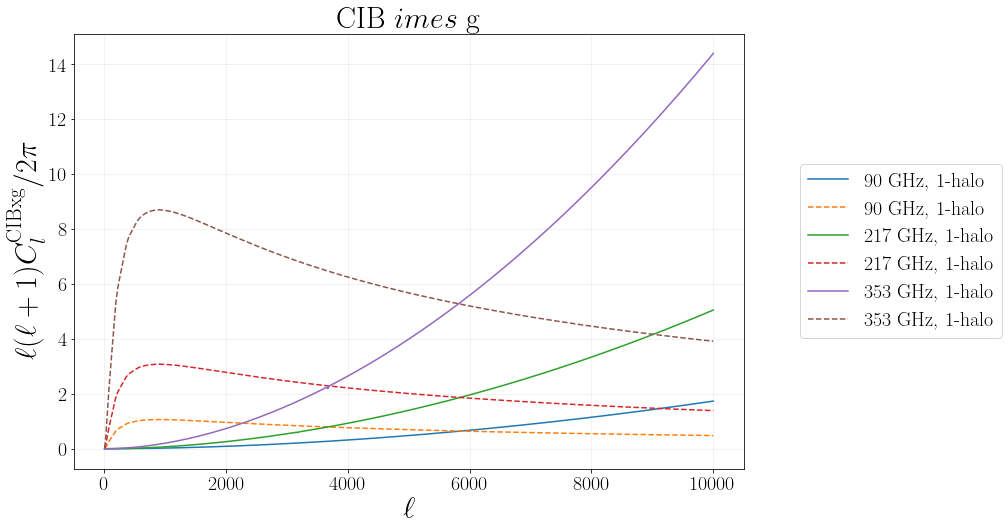

In [27]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{CIB}xg} / 2 \pi $", fontsize=30)
plt.title(r'CIB $\times$ g', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)


for (i,nu) in enumerate(nu_list):
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    
    plt.plot(cl_cib_g['217']['ell'], cl_cib_g_1h , label=r'%.1i GHz, 1-halo'%(nu))
    plt.plot(cl_cib_g['217']['ell'], cl_cib_g_2h , "--", label=r'%.1i GHz, 1-halo'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

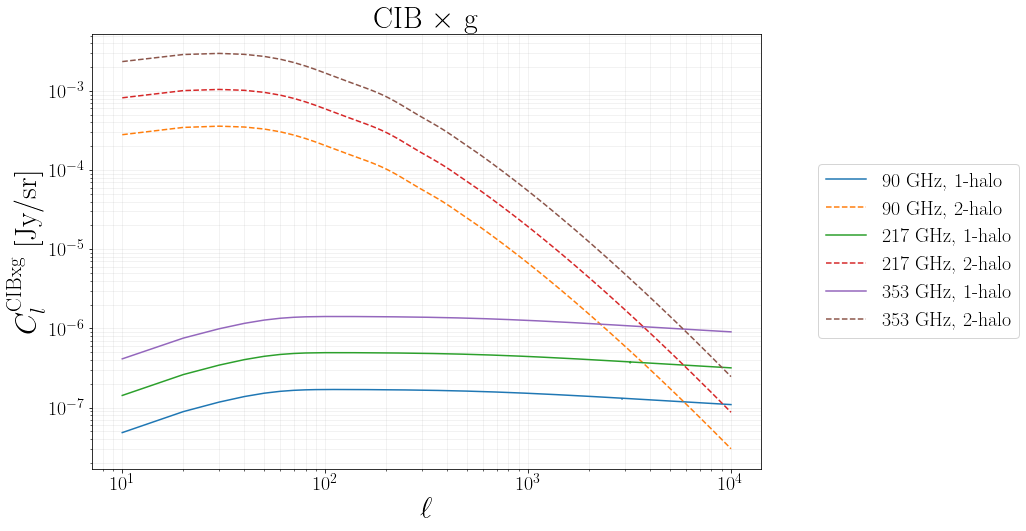

In [43]:
ell_cib_gal = np.asarray(cl_cib_g['217']['ell'])
fac = np.asarray(ell_cib_gal)*(ell_cib_gal+1.)/2./np.pi

plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$ C_l^{\rm{CIB}xg} $ [Jy/sr]", fontsize=30)
plt.title(r'CIB $\times$ g', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale("log")
plt.xscale("log")
plt.grid(which='both',alpha=0.2)


for (i,nu) in enumerate(nu_list):
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    
    plt.plot(cl_cib_g['217']['ell'], cl_cib_g_1h/fac, label=r'%.1i GHz, 1-halo'%(nu))
    plt.plot(cl_cib_g['217']['ell'], cl_cib_g_2h /fac, "--", label=r'%.1i GHz, 2-halo'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

##  gg

In [29]:
M = Class()
M.set(pdict)

M.set({
        'output':'gal_gal_1h, gal_gal_2h, gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h',
        'ell_min': 10.,
        'ell_max': 1e4,
        })        
M.compute()
    
    
cl_gg = M.cl_gg()
cl_gg_ell = np.asarray(cl_gg['ell'])
cl_gg_1h = np.asarray(cl_gg['1h'])
cl_gg_2h = np.asarray(cl_gg['2h'])

cl_to_dl_gg = cl_gg_ell*(cl_gg_ell+1)/2/np.pi

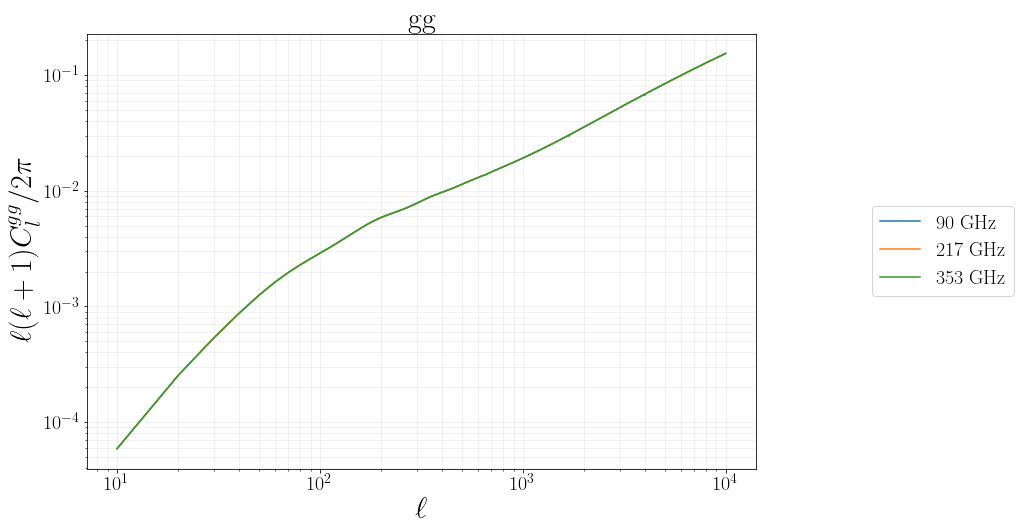

In [30]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{gg} / 2 \pi $", fontsize=30)
plt.title('gg', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

for (i,nu) in enumerate(nu_list): 
    plt.plot(cl_gg_ell, (cl_gg_1h+cl_gg_2h) , label=r'%.1i GHz'%(nu))

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

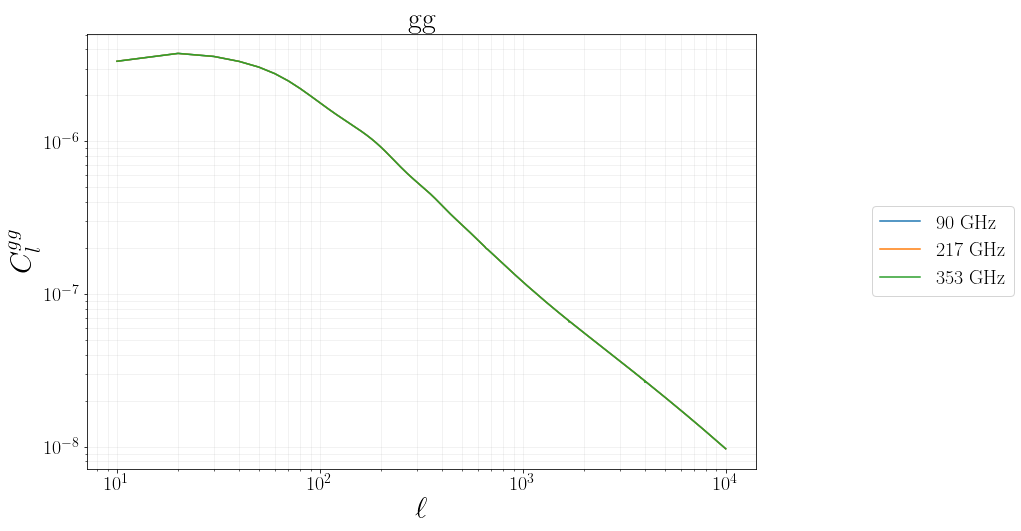

In [31]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$C_l^{gg}$", fontsize=30)
plt.title('gg', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

for (i,nu) in enumerate(nu_list): 
    plt.plot(cl_gg_ell, (cl_gg_1h+cl_gg_2h)/cl_to_dl_gg , label=r'%.1i GHz'%(nu))

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

# Plot everything 

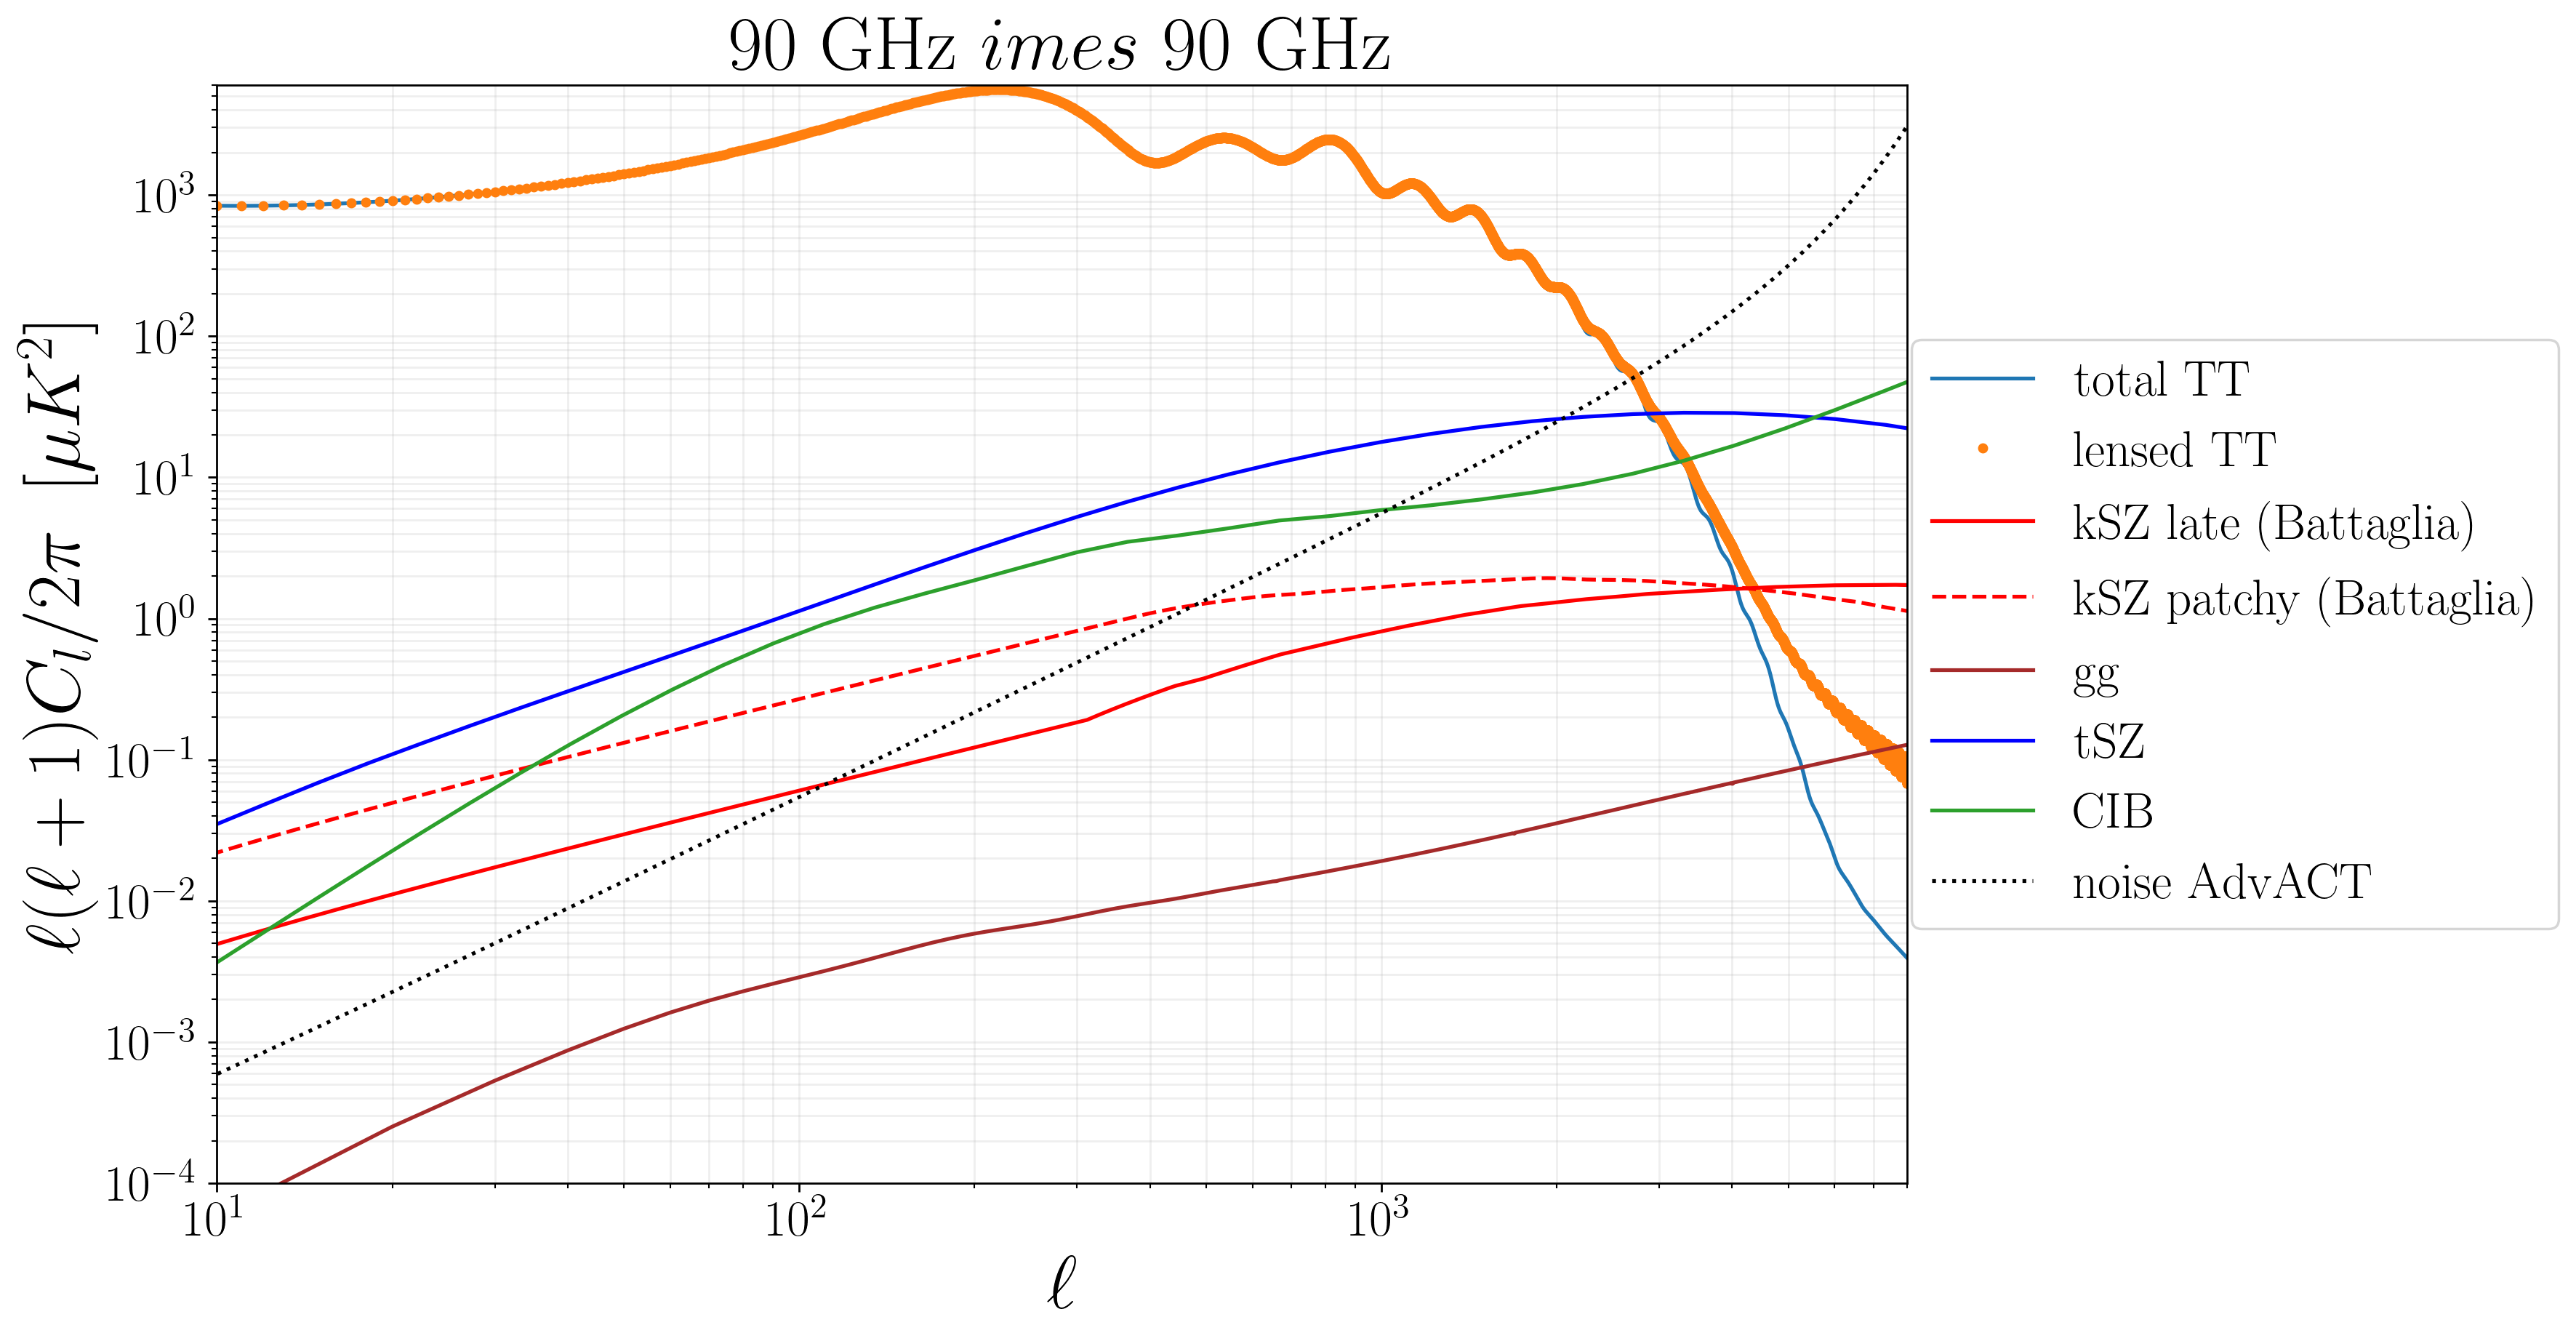

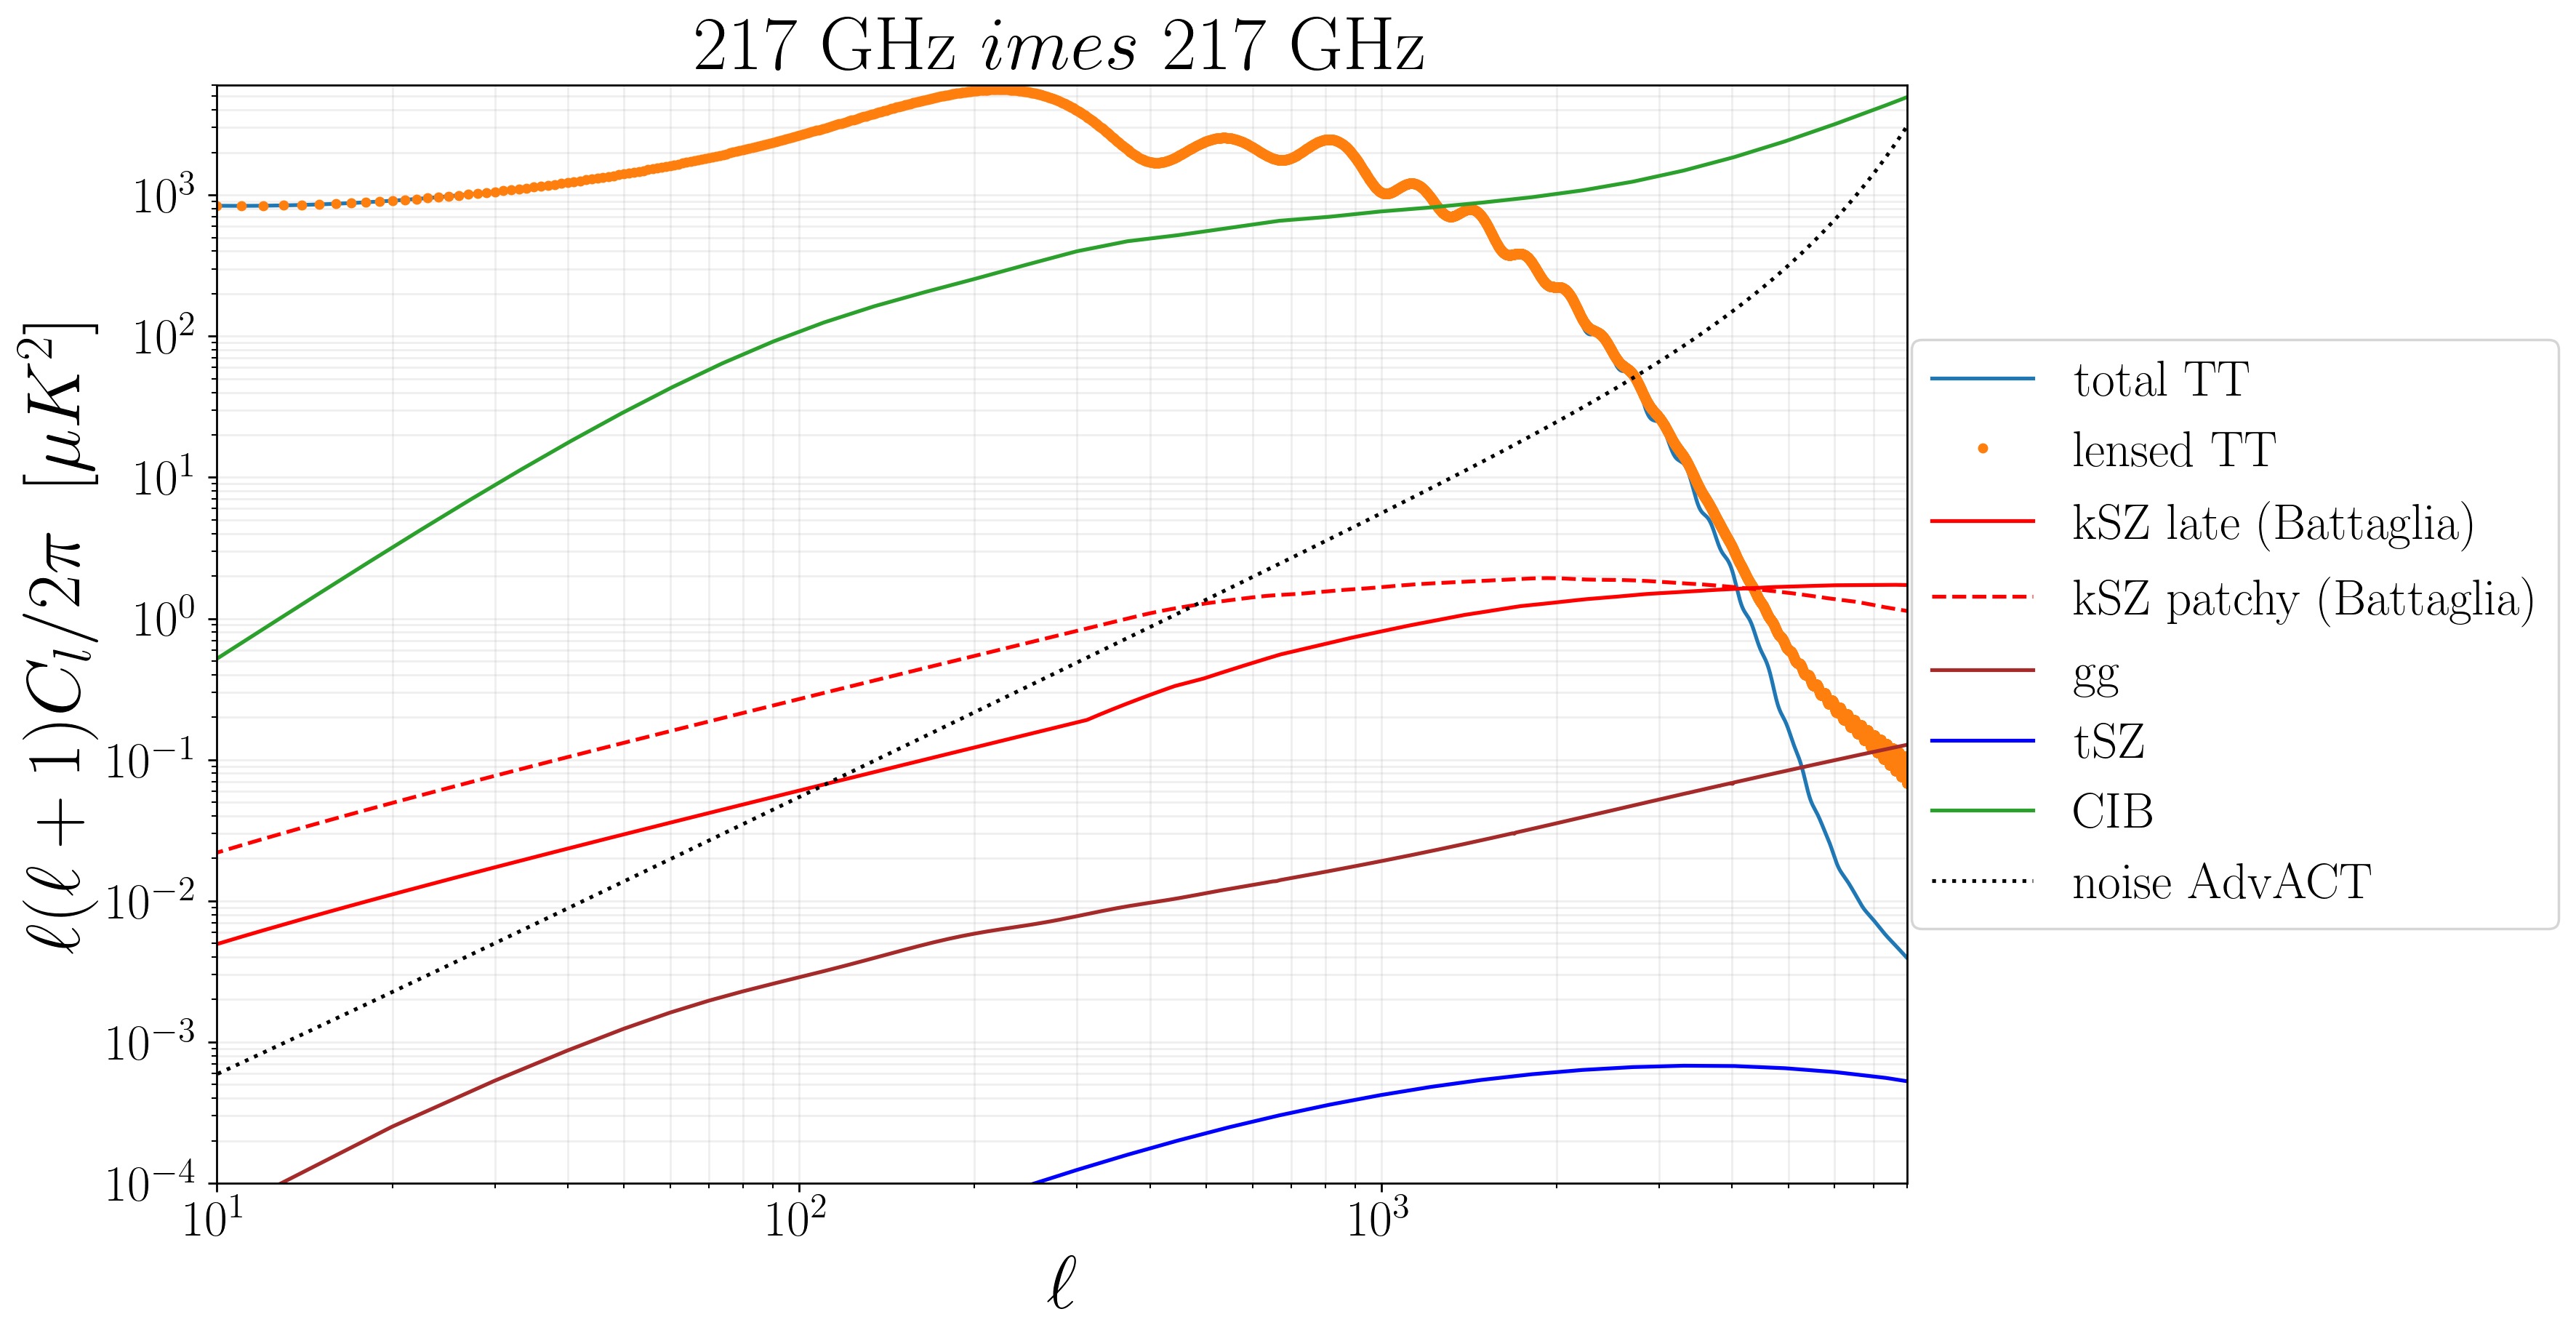

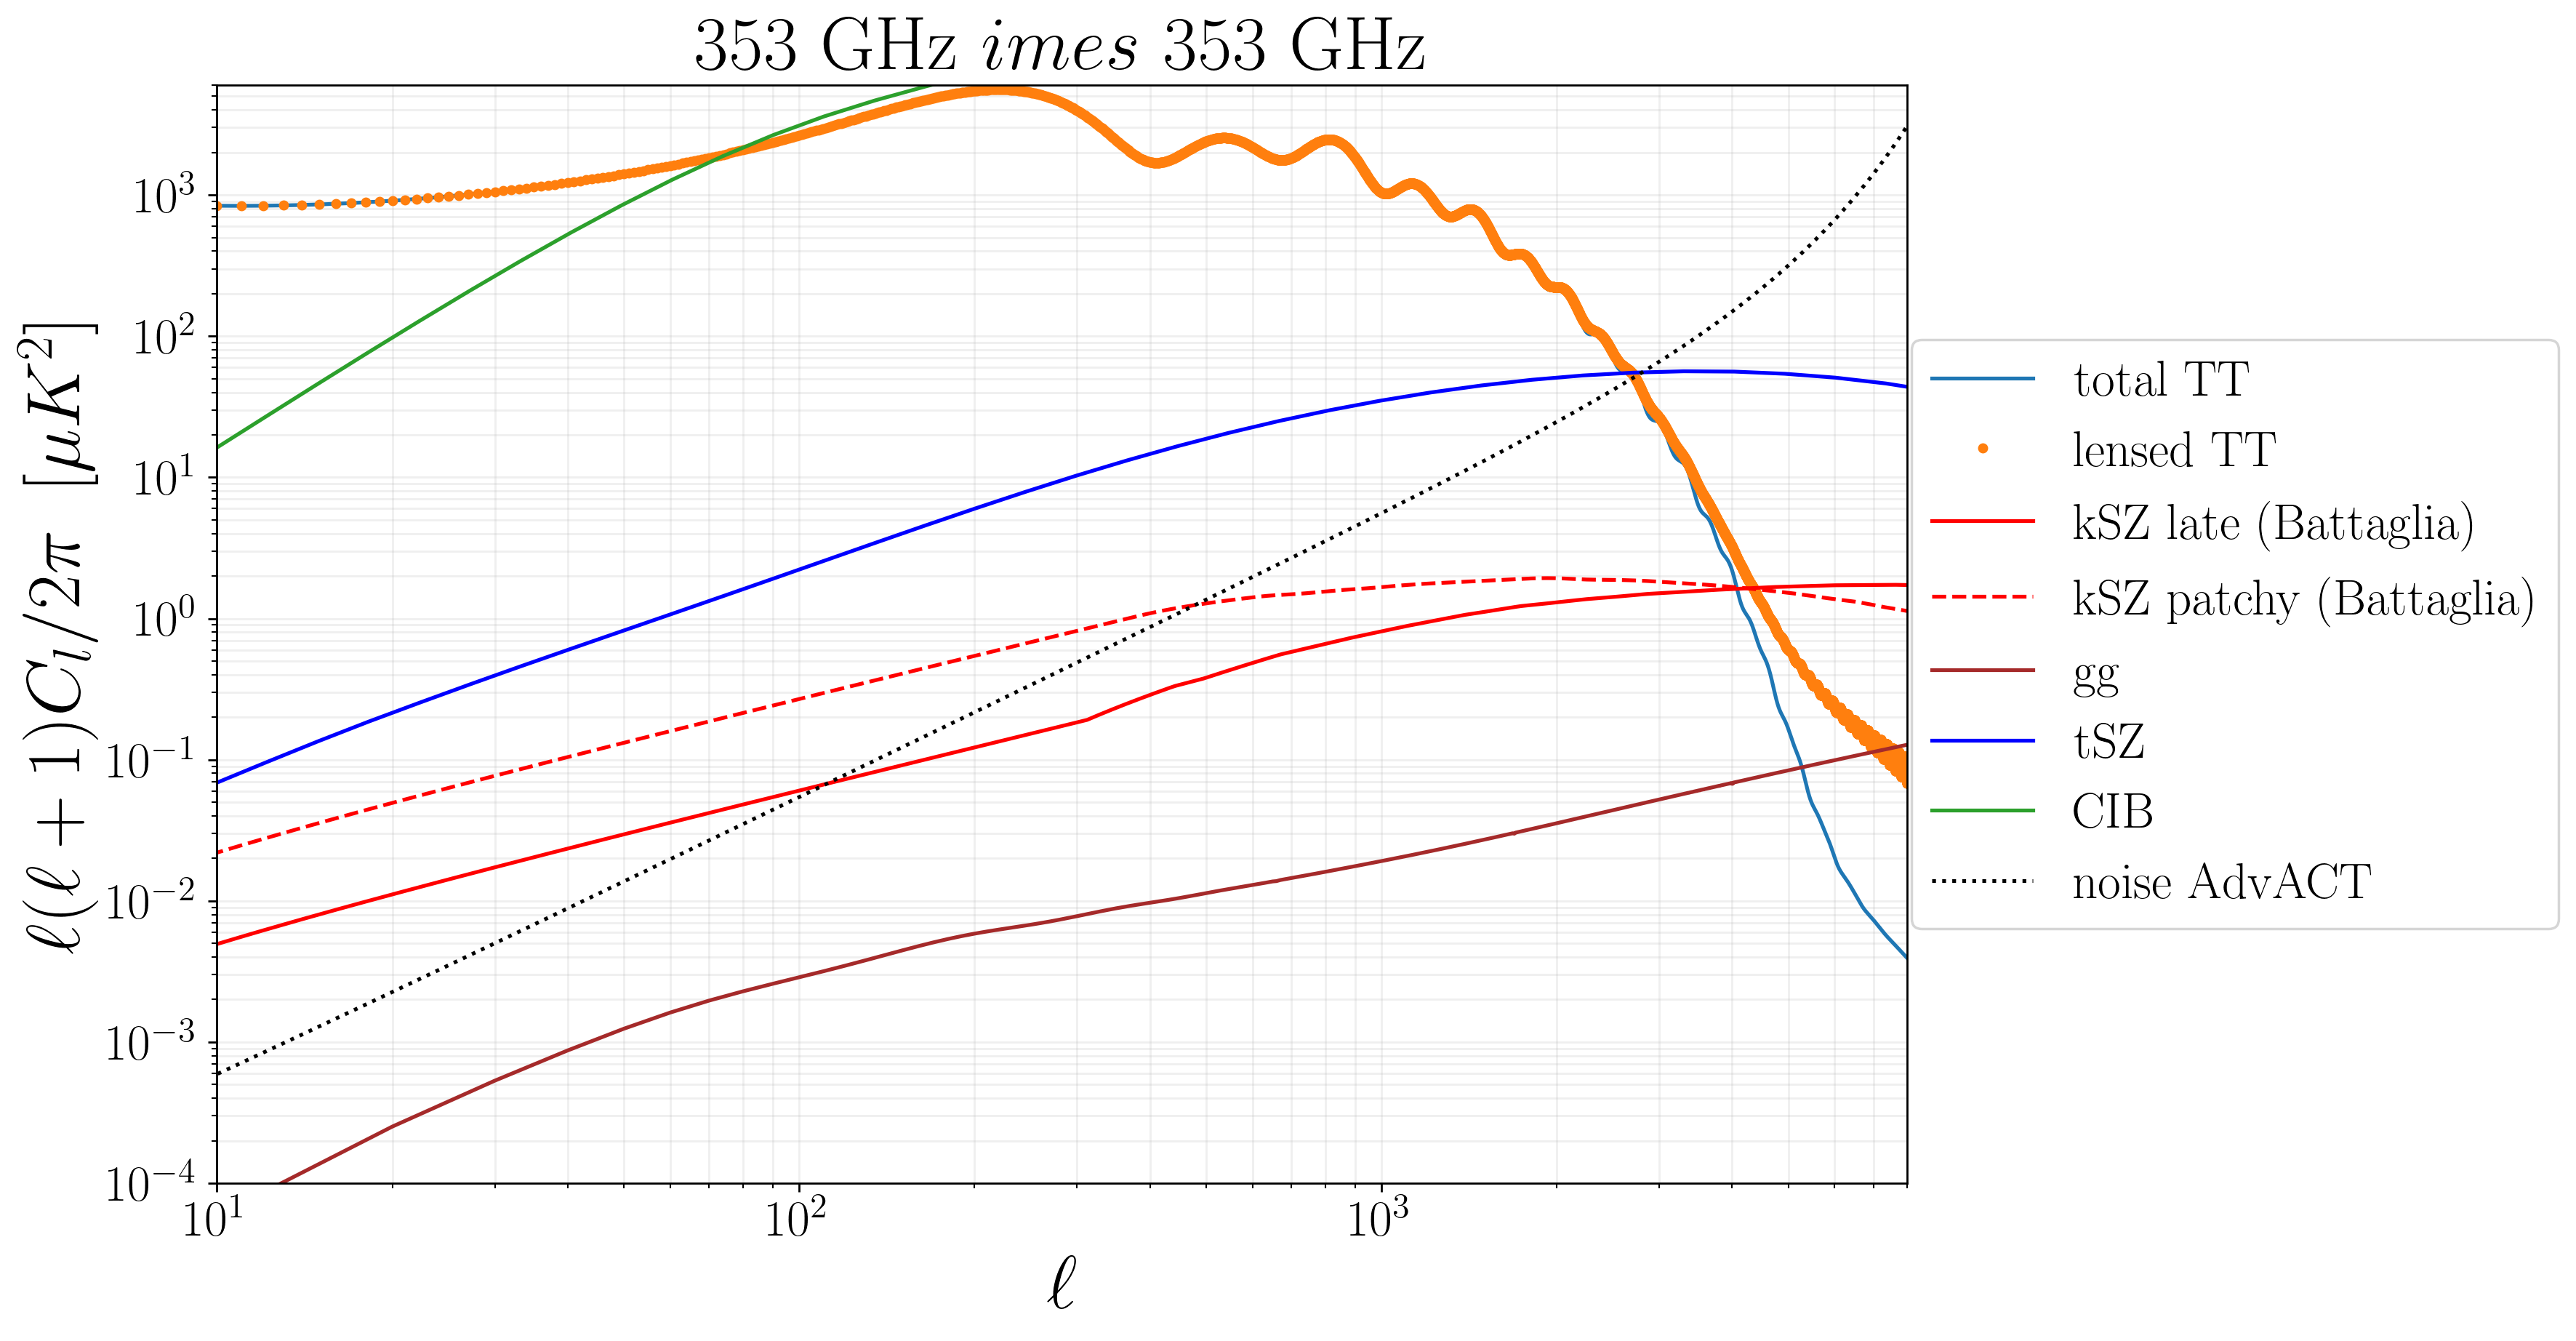

In [32]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(12,8), dpi=250)
    plt.xlabel(r"$\ell$", fontsize=30)
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(nu_list[i])+' GHz $\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    
    ## CMB
    plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')
    plt.plot(ell, 1.e12*factor*cl_lensed['tt'],".",label='lensed TT')    
    ## kSZ
    #plt.plot(ell_theory_battaglia, dl_kSZ_theory_battaglia, color = "red", label = "kSZ (Battaglia) ")
    plt.plot(ell_theory_battaglia, CellkSZhomog[:,1], color = "red", label = "kSZ late (Battaglia) ")
    plt.plot(ell_theory_battaglia, CellkSZpatchy[:,1],"--",  color = "red", label = "kSZ patchy (Battaglia) ")
    ## gg
    plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg')
    
    ## tSZ
    plt.plot(cls_tSZ[i]['ell'],cls_tSZ[i]['1h']+cls_tSZ[i]['2h'], color="blue", label=r'tSZ')
    ## tSZ x g
    #plt.plot(cls_tSZxg[i]['ell'],cls_tSZxg[i]['1h']+cls_tSZxg[i]['2h'], "--",color="lightblue", label=r'tSZ $\times$ g')
    
    ## CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls
    equiv = u.thermodynamic_temperature(nu * u.GHz, Planck15.Tcmb0)
    CIB_uK = ((dls_cib_1h+dls_cib_2h) * u.Jy / u.sr).to(u.mK, equivalencies=equiv)  
    plt.plot(cl_cib_cib['217x217']['ell'], CIB_uK, label=r'CIB')
    
    ## CIB x g 
    #cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    #cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    #plt.plot(cl_cib_g['217']['ell'], cl_cib_g_1h+ cl_cib_g_2h , color="lightgreen", label=r'CIB $\times$ g')

    ## noise
    plt.plot(ell_noise, ell_noise*(ell_noise+1)*cl_noise/2/np.pi, ":", color = "black", label="noise AdvACT")
    
    
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(10, 8.e3)
    plt.ylim(1e-4,6.e3)  
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

    ##Save the curves
    np.savetxt("/Users/aleksandra/Desktop/ILC/data/"+str(nu_list[i])+"GHz_ell_dl_CIB.txt", (cl_cib_cib['217x217']['ell'], CIB_uK))
    np.savetxt("/Users/aleksandra/Desktop/ILC/data/"+str(nu_list[i])+"GHz_ell_dl_tSZ.txt", (cls_tSZ[i]['ell'],cls_tSZ[i]['1h']+cls_tSZ[i]['2h']))
np.savetxt("/Users/aleksandra/Desktop/ILC/data/ell_dl_CMB_lensed.txt", (ell, 1.e12*factor*cl_lensed['tt']))
np.savetxt("/Users/aleksandra/Desktop/ILC/data/ell_dl_CMB.txt", (ell, 1.e12*factor*cl_tot['tt']))
np.savetxt("/Users/aleksandra/Desktop/ILC/data/ell_dl_gg.txt", (cl_gg_ell, cl_gg_1h+cl_gg_2h))


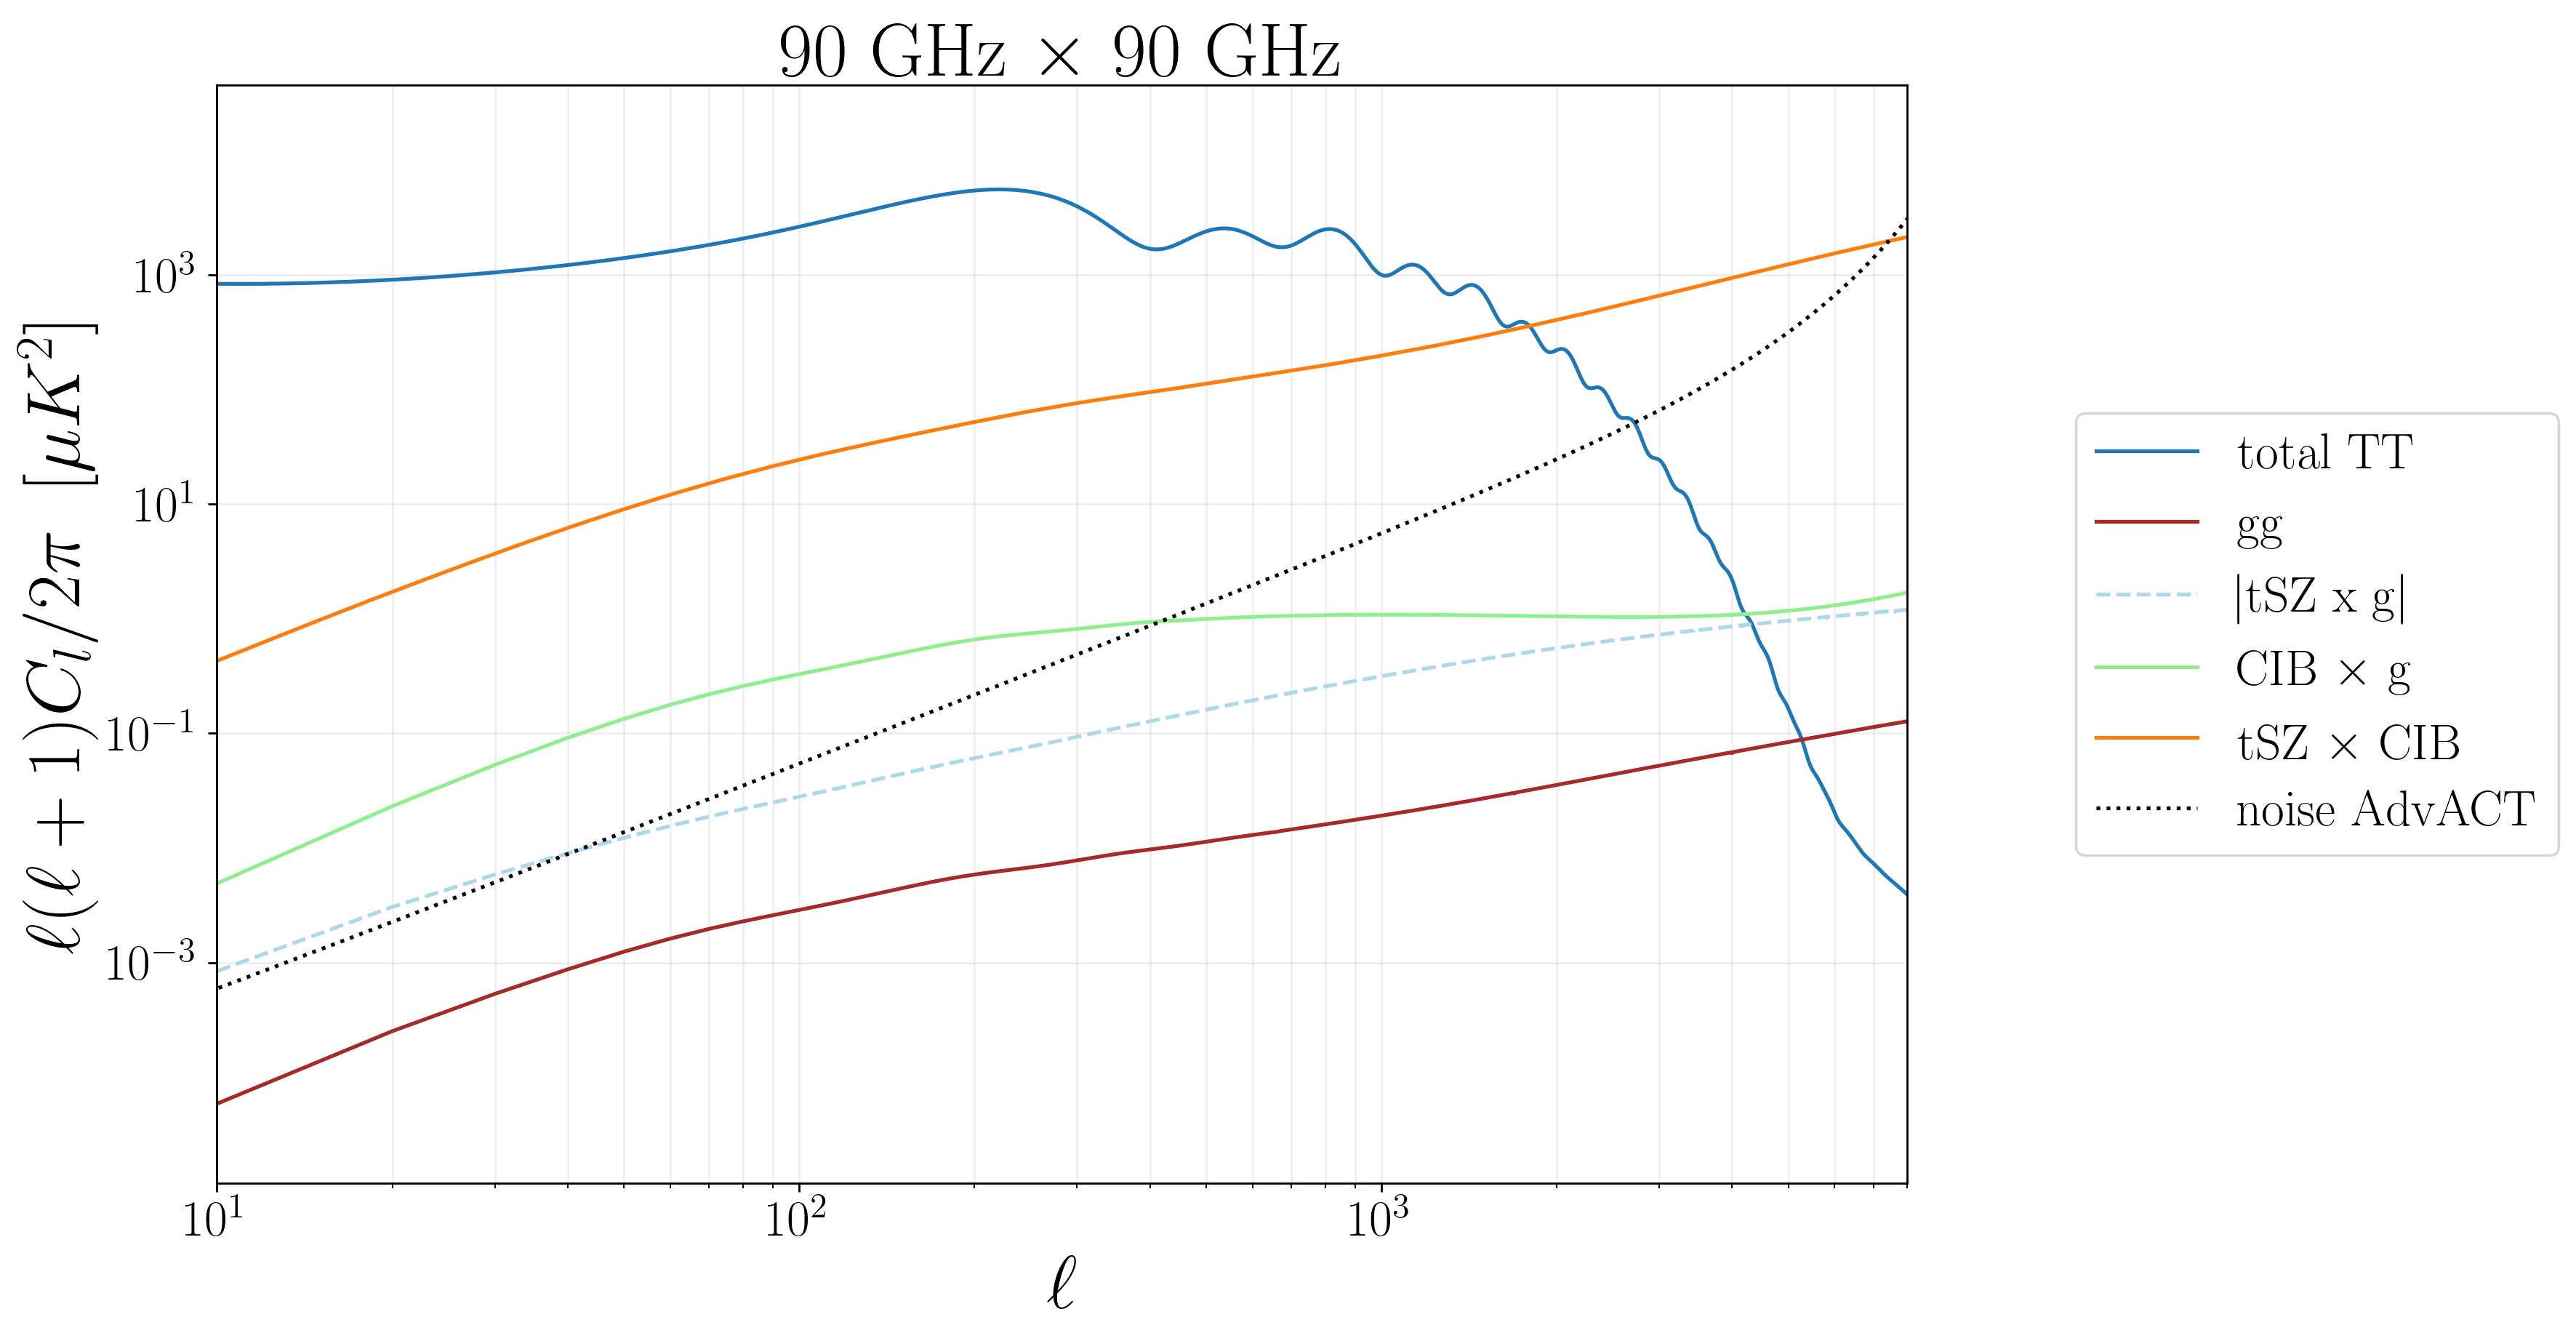

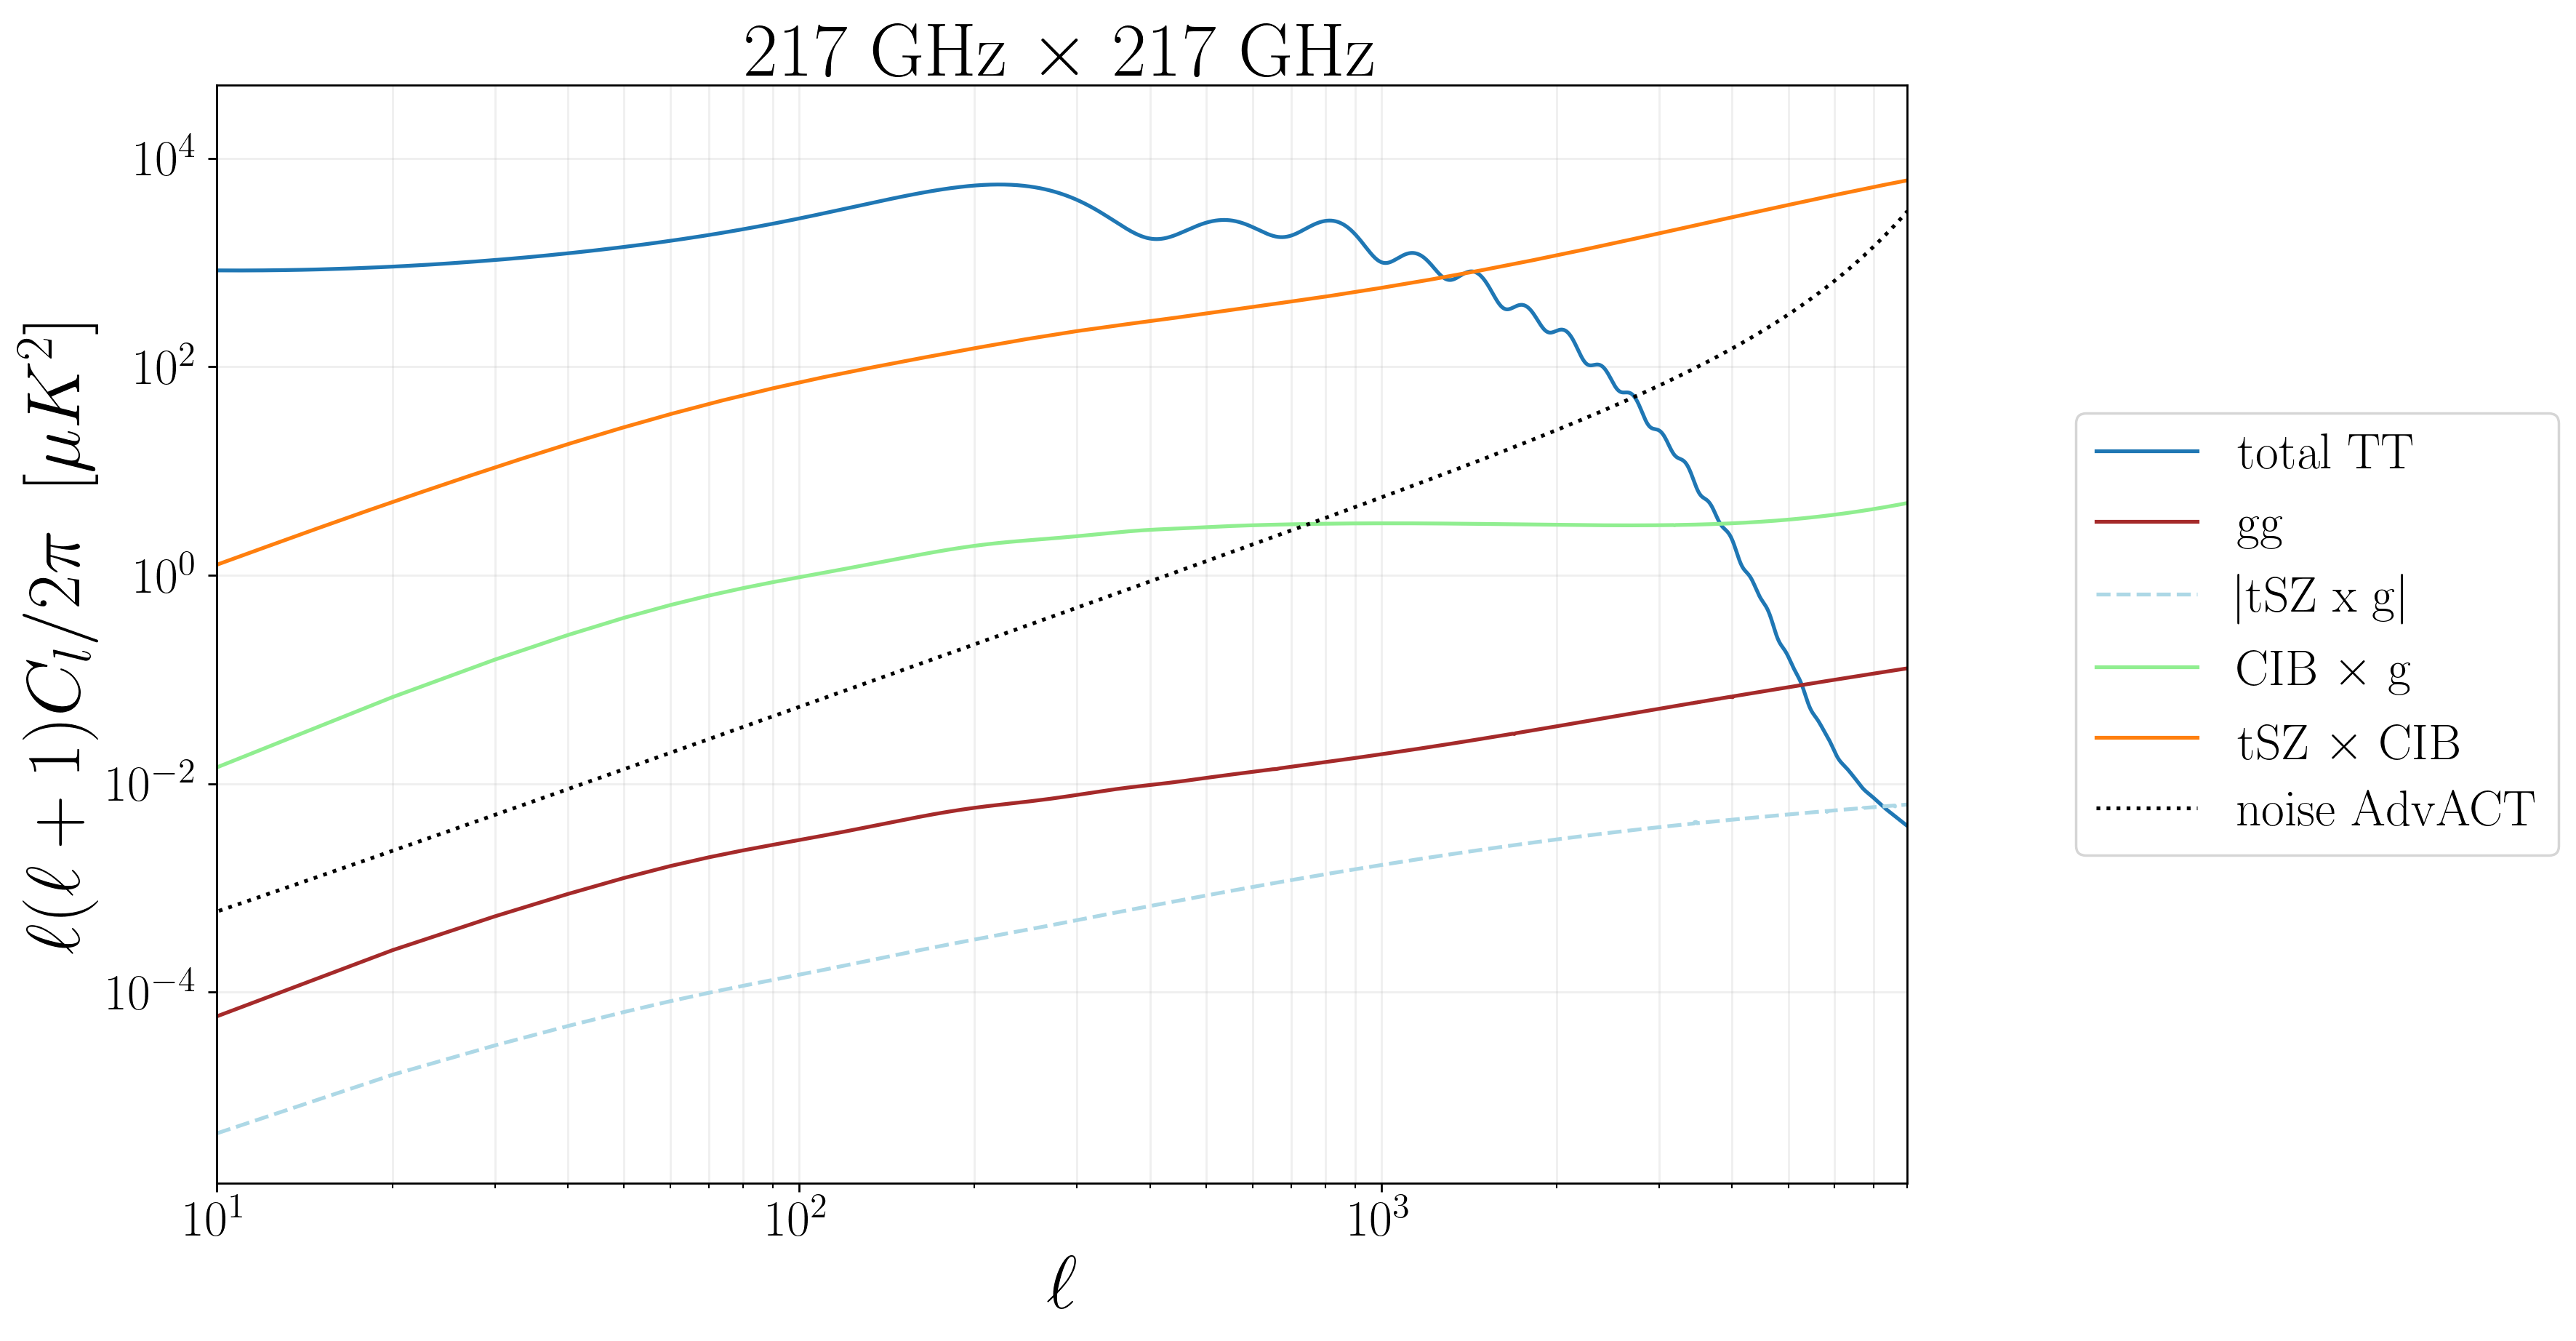

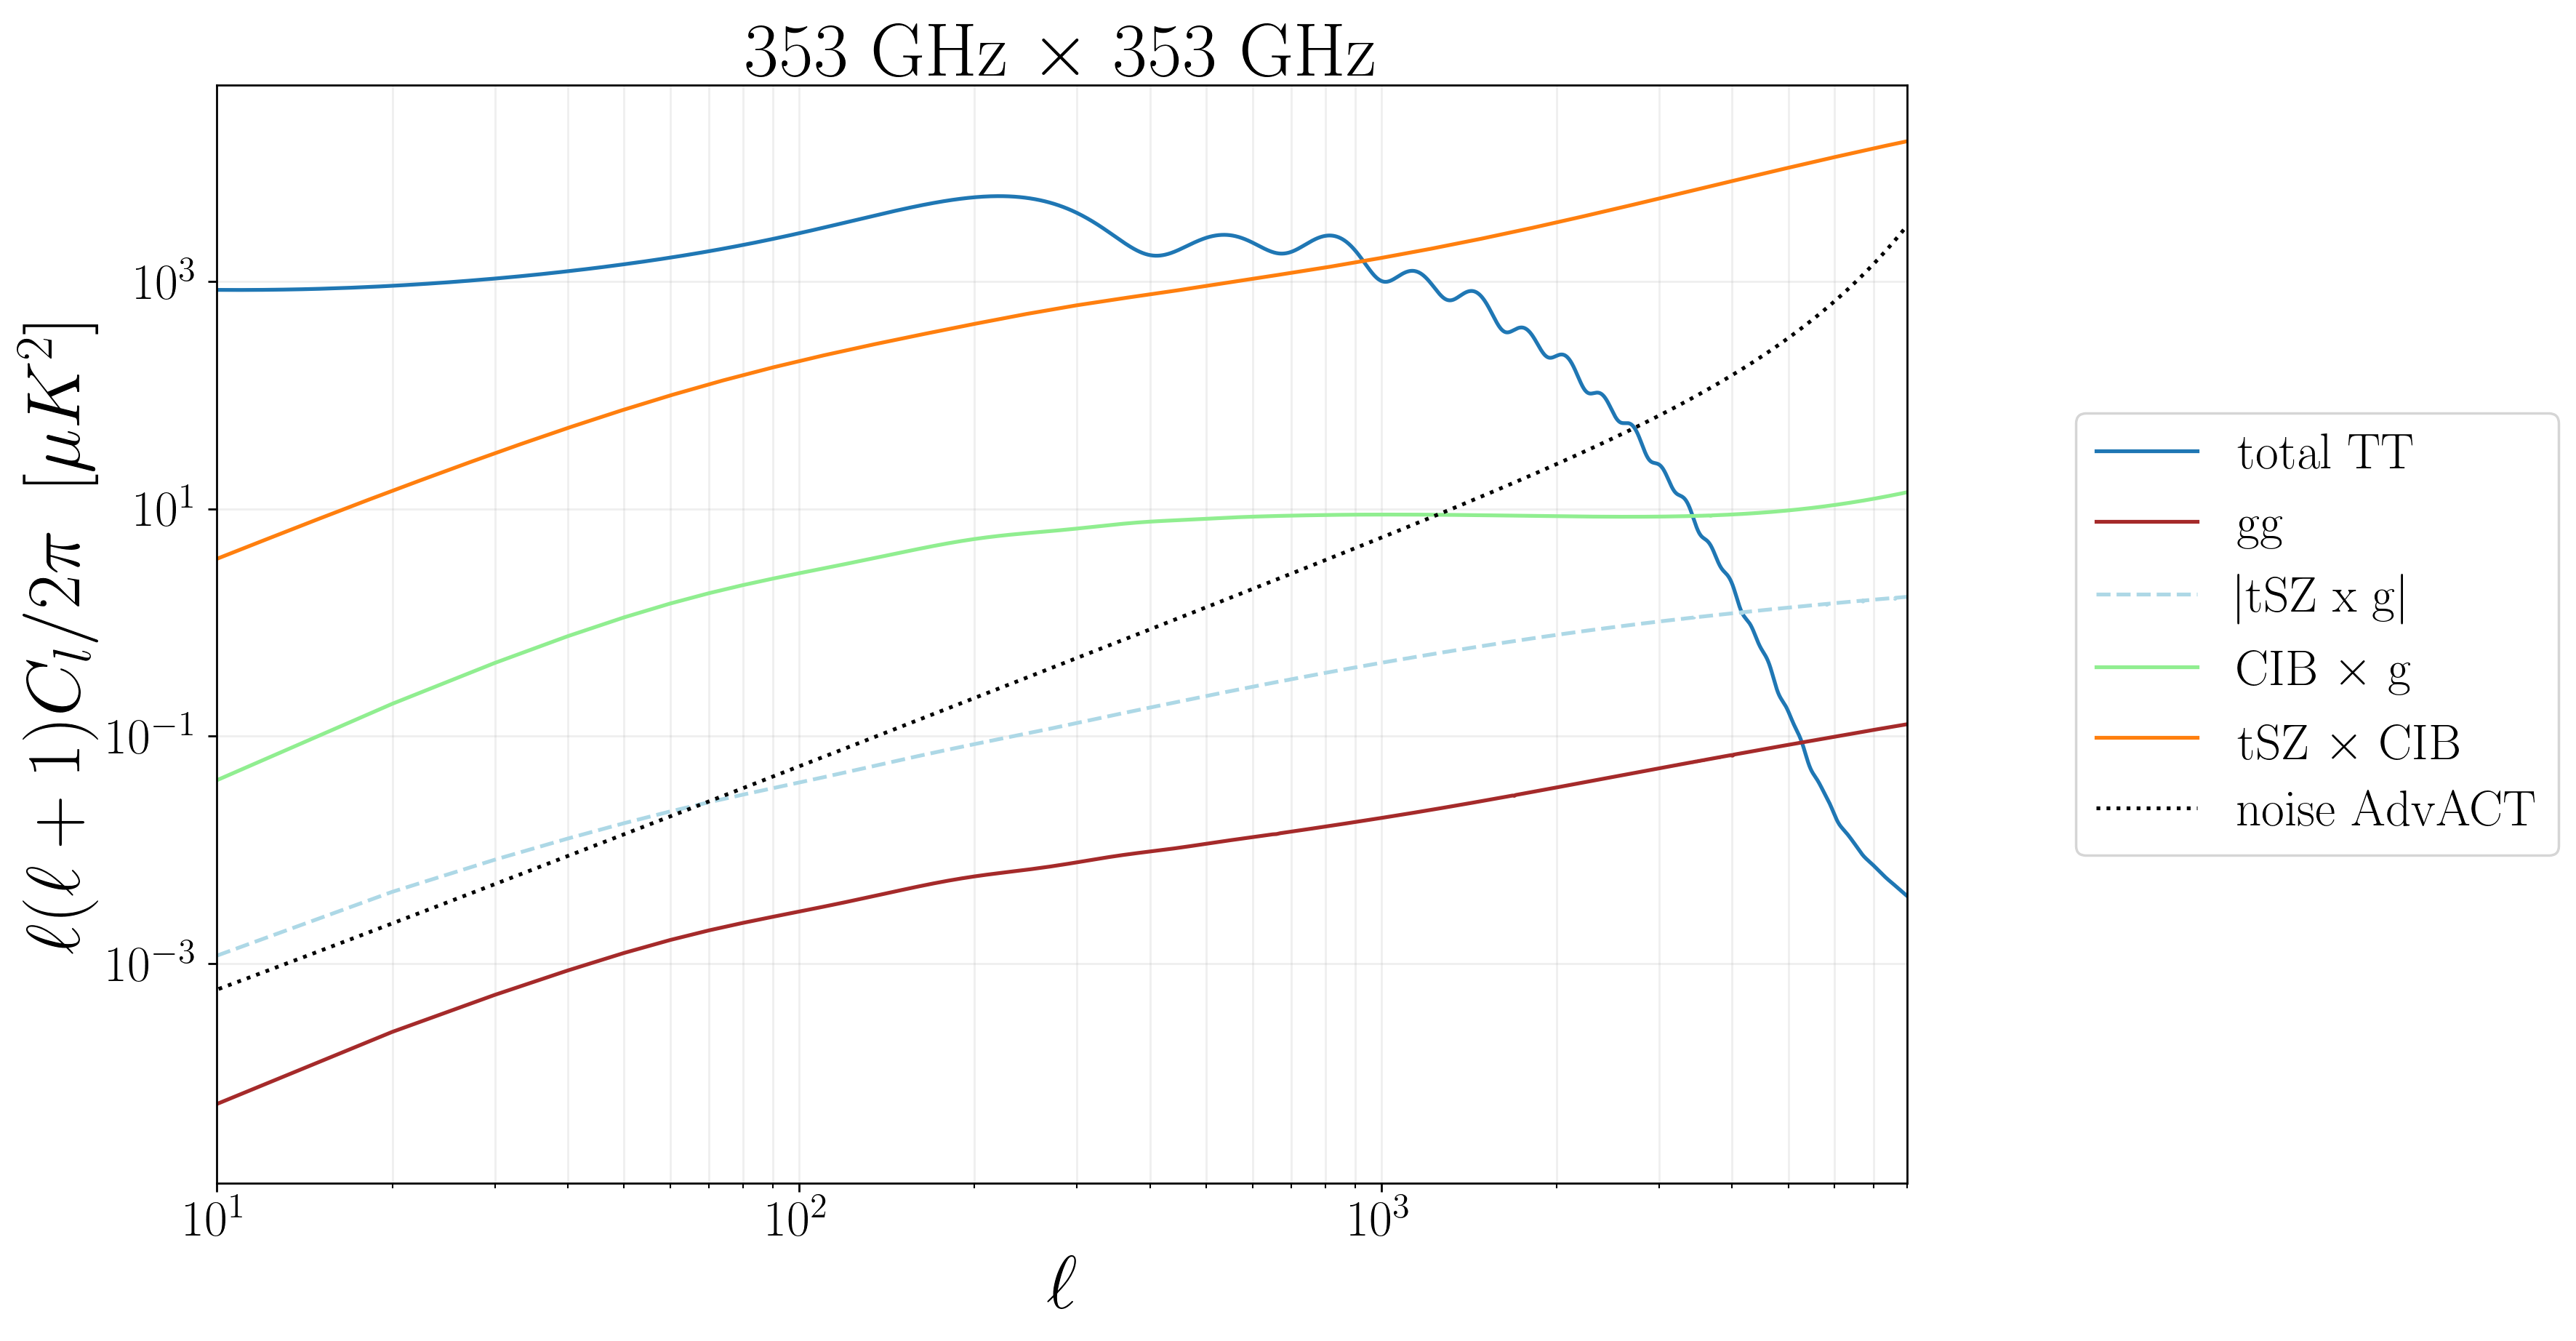

In [42]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(12,8), dpi=250)
    plt.xlabel(r"$\ell$", fontsize=30)
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    
    # CMB
    plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')
    #plt.plot(ell, 1.e12*factor*cl_lensed['tt'],".",label='lensed TT')    
    ## gg
    plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg')
    
    # tSZ x g
    plt.plot(cls_tSZxg[i]['ell'],abs(cls_tSZxg[i]['1h']+cls_tSZxg[i]['2h']), "--",color="lightblue", label=r'$|$tSZ x g$|$')
    
    #CIB x g 
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    equiv = u.thermodynamic_temperature(nu * u.GHz, Planck15.Tcmb0)
    CIBg_uK = ((cl_cib_g_1h+cl_cib_g_2h) * u.Jy / u.sr).to(u.mK, equivalencies=equiv)  
    plt.plot(cl_cib_g['217']['ell'], cl_cib_g_1h+ cl_cib_g_2h , color="lightgreen", label=r'CIB $\times$ g')
    #plt.plot(cl_cib_g['217']['ell'], CIBg_uK , color="lightgreen", label=r'CIB $\times$ g')

    #tSZ x CIB 
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    equiv = u.thermodynamic_temperature(nu * u.GHz, Planck15.Tcmb0)
    CIBtSZ_uK = ((cl_tsz_cib_1h+cl_tsz_cib_2h) * u.Jy / u.sr).to(u.mK, equivalencies=equiv) 
    plt.plot(ell_tsz_cib, cl_tsz_cib_1h+cl_tsz_cib_2h,'-',label=r'tSZ $\times$ CIB')
    #plt.plot(ell_tsz_cib, CIBtSZ_uK, label=r'tSZ $\times$ CIB')
    
    
    #noise
    plt.plot(ell_noise, ell_noise*(ell_noise+1)*cl_noise/2/np.pi, ":", color = "black", label="noise AdvACT")
    
    
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(10, 8.e3)
    #plt.ylim(1e-4,6.e3)  
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

    ##Save the curves
    np.savetxt("/Users/aleksandra/Desktop/ILC/data/"+str(nu_list[i])+"GHz_ell_dl_tSZxCIB.txt", (ell_tsz_cib, cl_tsz_cib_1h+cl_tsz_cib_2h))
    np.savetxt("/Users/aleksandra/Desktop/ILC/data/"+str(nu_list[i])+"GHz_ell_dl_tSZxg.txt", (cls_tSZxg[i]['ell'],(cls_tSZxg[i]['1h']+cls_tSZxg[i]['2h'])))
    np.savetxt("/Users/aleksandra/Desktop/ILC/data/"+str(nu_list[i])+"GHz_ell_dl_CIBxg.txt", ( cl_cib_g['217']['ell'], cl_cib_g_1h+ cl_cib_g_2h ) )


# Plot cross frequencies 

## CIB x CIB

217x90
353x90
353x217


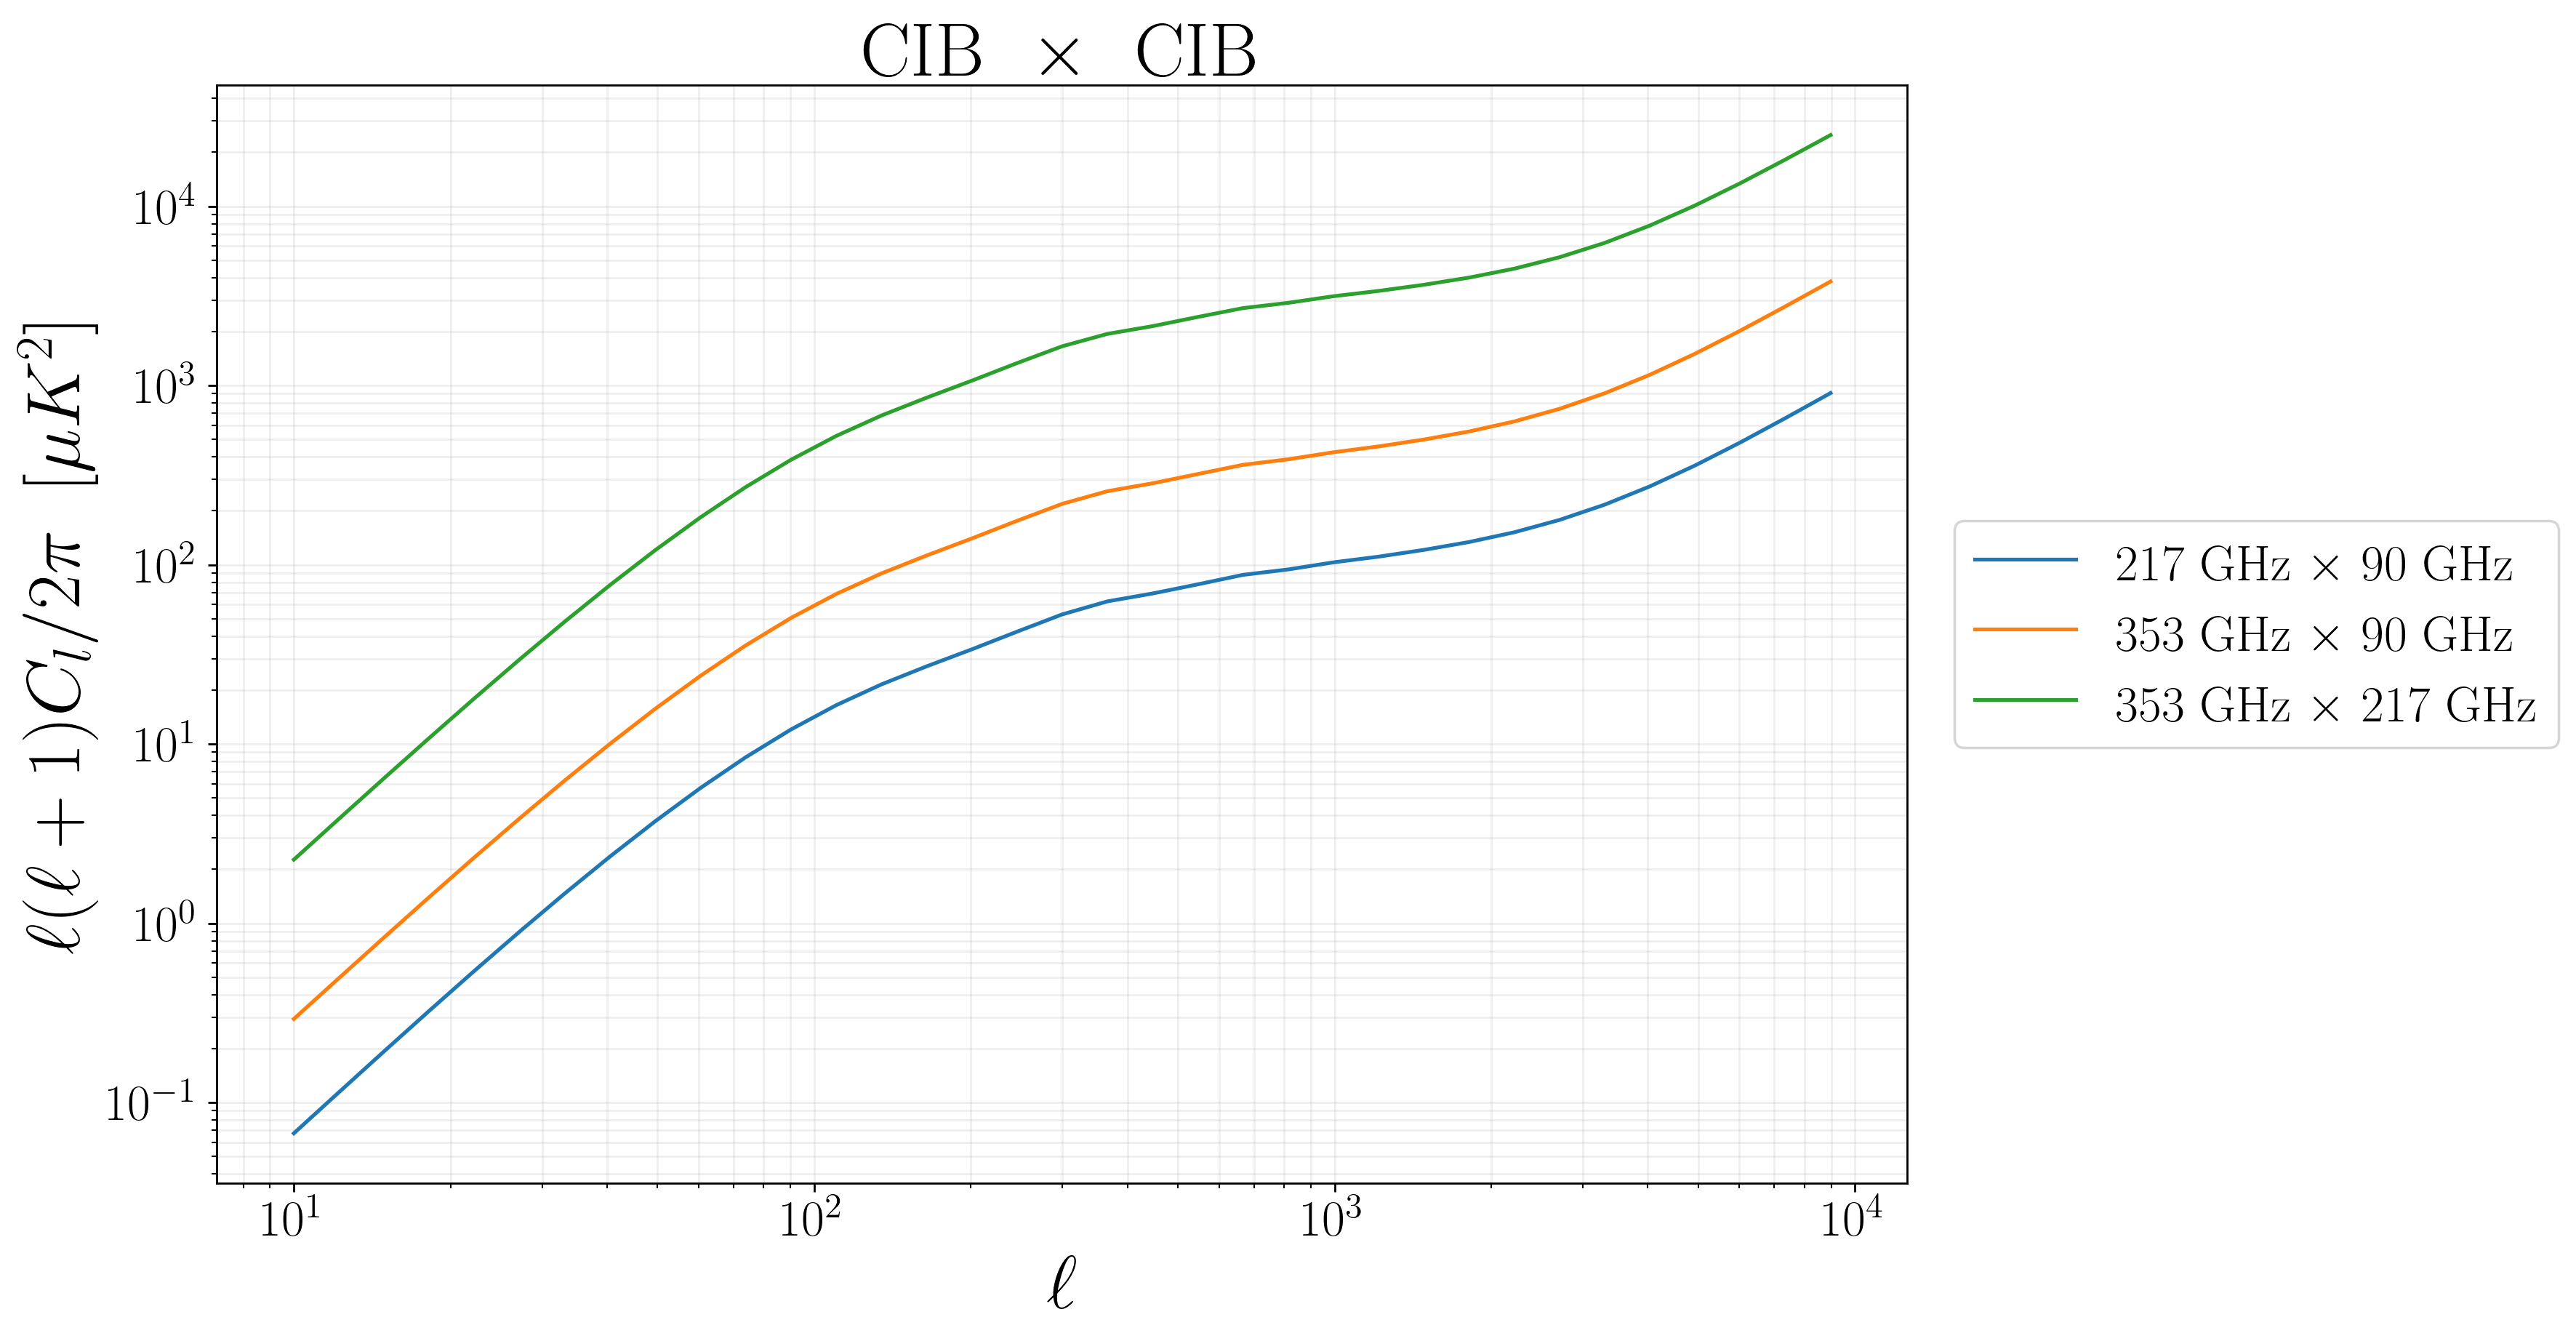

In [95]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(r"CIB \ $\times$ \ CIB", fontsize =30)
  
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)


for (i,nu1) in enumerate(nu_list):
    for (j,nu2) in enumerate(nu_list):
        if nu1!=nu2:
            nu1_nu2 = str(nu1)+"x"+str(nu2)
            if nu1_nu2 in cl_cib_cib:
                print(nu1_nu2)
                cl_cib_1h = np.asarray(cl_cib_cib[nu1_nu2]['1h'])
                cl_cib_2h = np.asarray(cl_cib_cib[nu1_nu2]['2h'])
                # is this units conversion correct ??
                equiv1 = u.thermodynamic_temperature(nu1 * u.GHz, Planck15.Tcmb0)
                equiv2 = u.thermodynamic_temperature(nu2 * u.GHz, Planck15.Tcmb0)  
                cl_cib_uK = ((cl_cib_1h+cl_cib_2h) * u.Jy / u.sr ).to(u.mK, equivalencies=equiv2) 
                plt.plot(cl_cib_cib['217x217']['ell'], cl_cib_uK, label=r"%.1i GHz $\times$ %.1i GHz"%(nu1,nu2))#str(mu)+"x"+str(niu))
  
        
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## tSZ x tSZ 

In [88]:
#cl_sz

In [82]:
# function used to compute tsz at nu (inside class-sz)
def cl_sz_at_nu1_nu2_in_GHz_in_microK2(cl_sz, nu1_in_GHz, nu2_in_GHz):
    print(nu1_in_GHz, nu2_in_GHz)
    frequency1_in_Hz, frequency2_in_Hz = nu1_in_GHz*1e9, nu2_in_GHz*1e9
    _h_P_=6.62606896e-34
    _k_B_=1.3806504e-23
    Tcmb_gNU1 = TCMB*((_h_P_*frequency1_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency1_in_Hz/(_k_B_*TCMB))/2.))-4.)
    Tcmb_gNU2 = TCMB*((_h_P_*frequency2_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency2_in_Hz/(_k_B_*TCMB))/2.))-4.)
    
    r = {}
    r['ell'] = np.asarray(cl_sz['ell'])
    r['1h'] = np.asarray(cl_sz['1h'])*Tcmb_gNU1*Tcmb_gNU2
    r['2h'] = np.asarray(cl_sz['2h'])*Tcmb_gNU1*Tcmb_gNU2
    return r

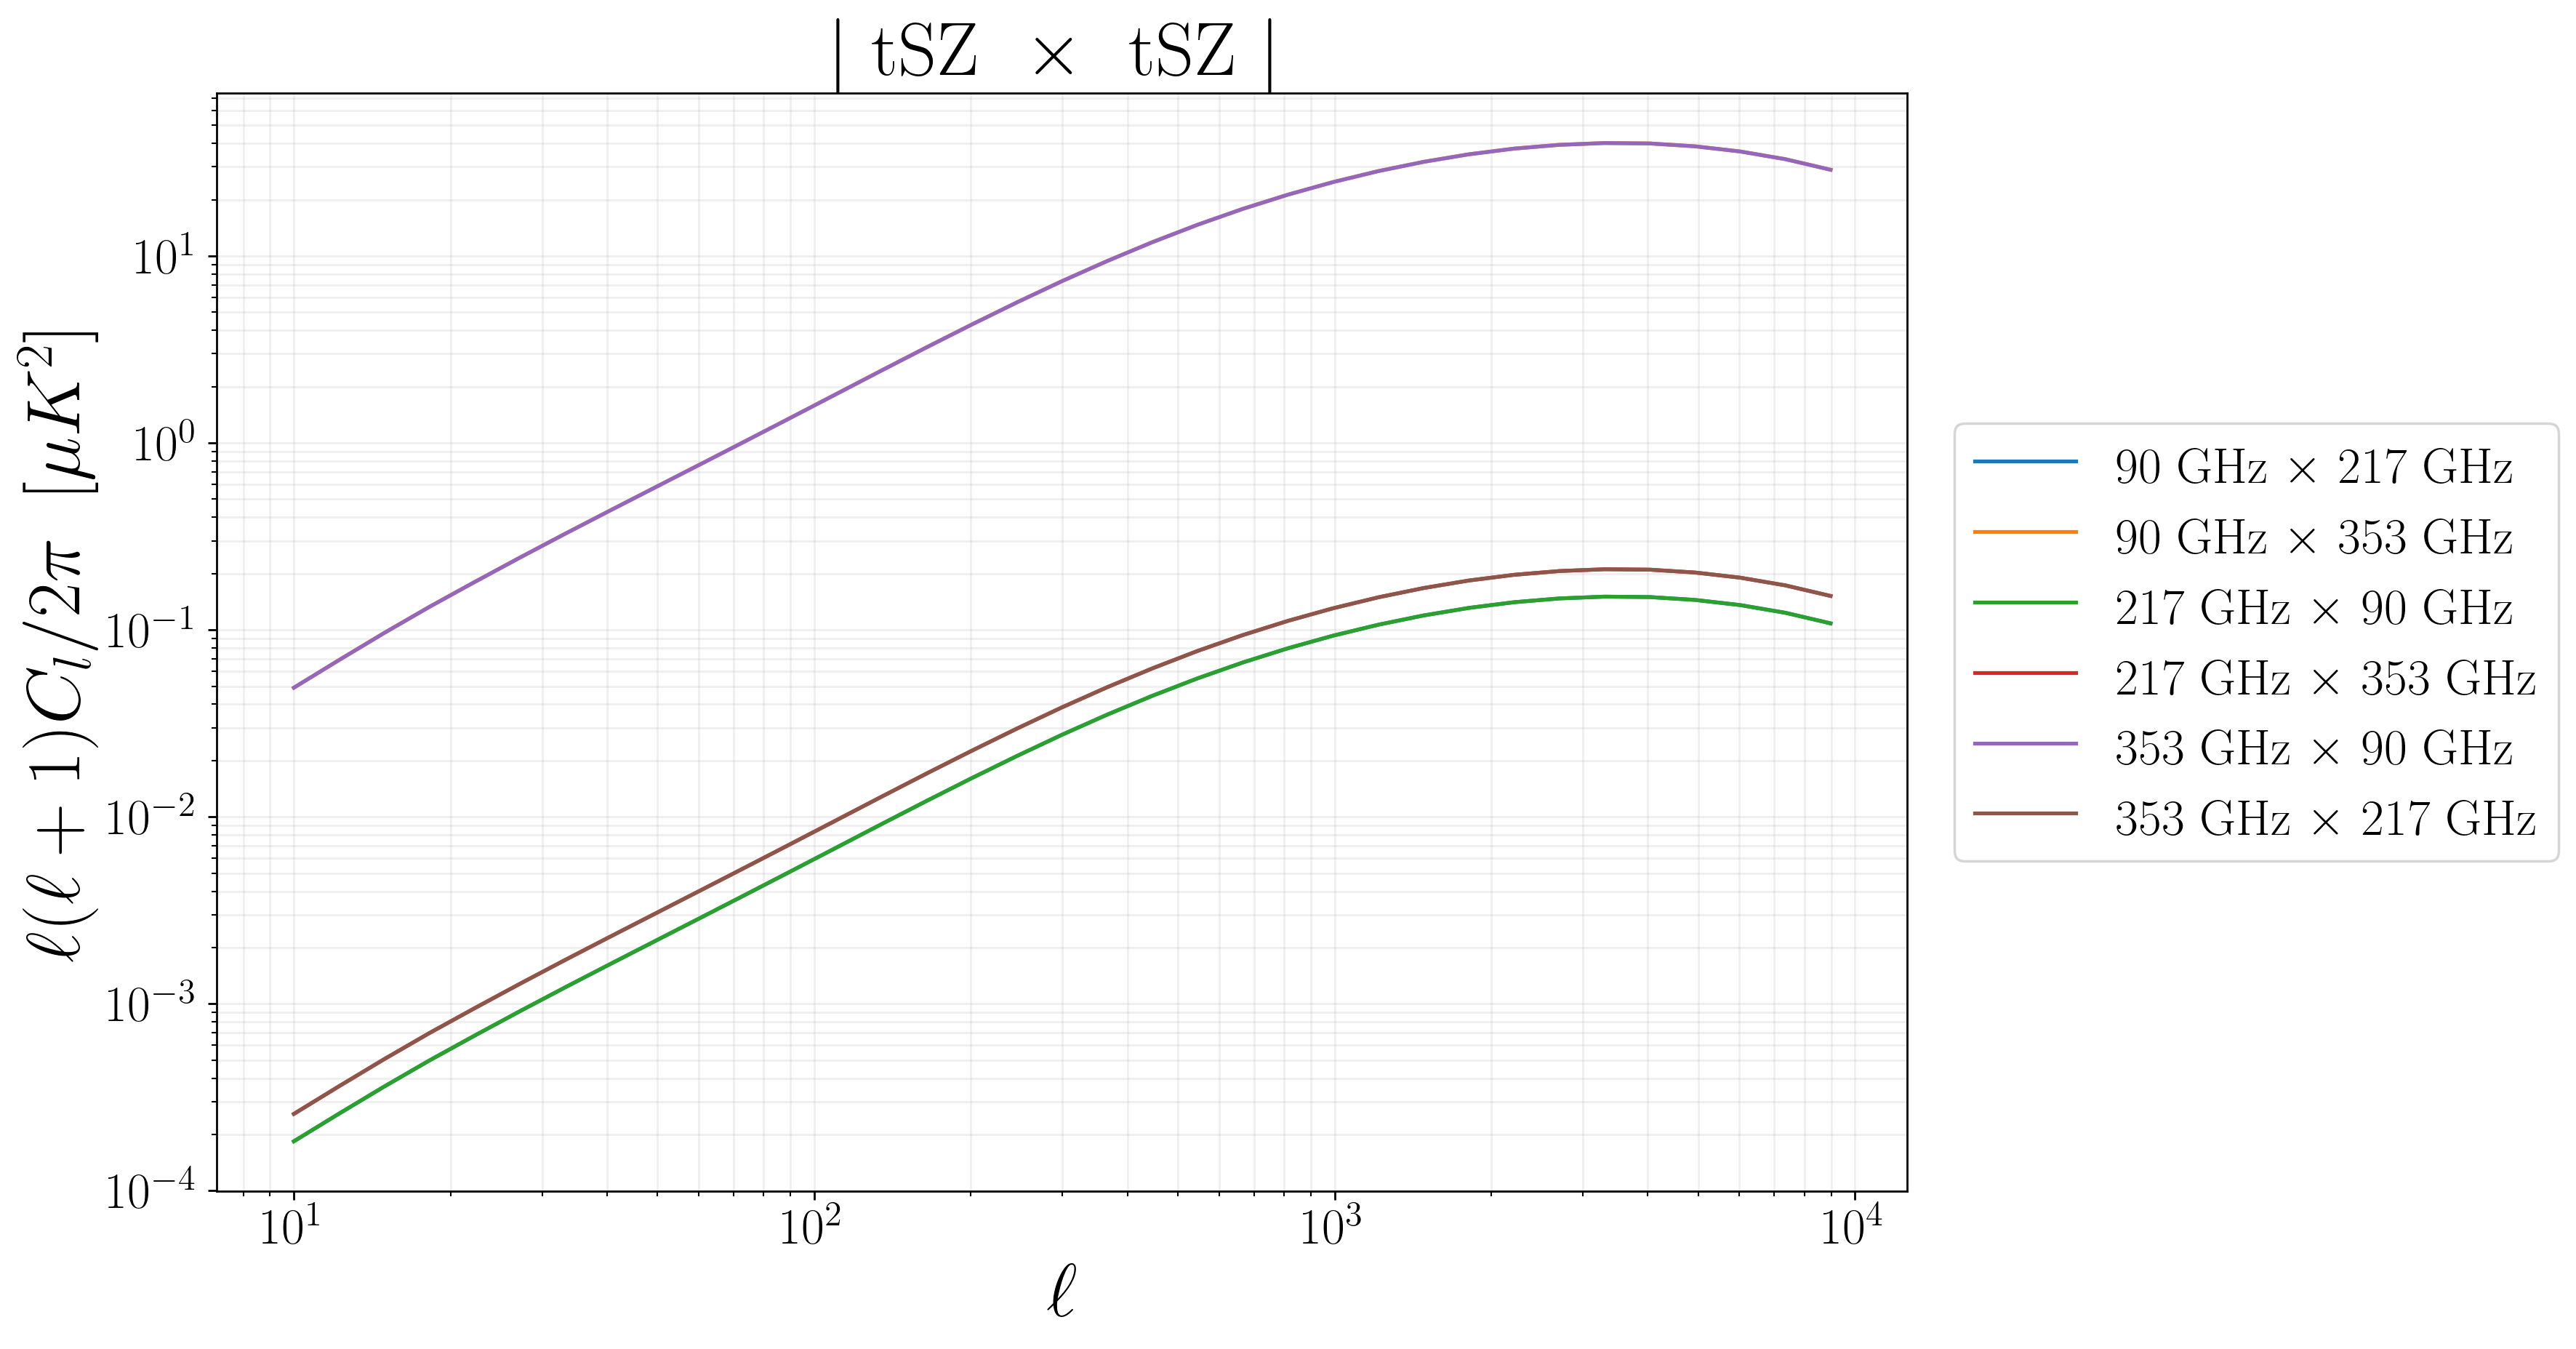

In [96]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(r"$|$ tSZ \ $\times$ \ tSZ $|$", fontsize =30)
  
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)

_h_P_=6.62606896e-34
_k_B_=1.3806504e-23

for (i,nu1) in enumerate(nu_list):
    for (j,nu2) in enumerate(nu_list):
        if nu1!=nu2:
            frequency1_in_Hz, frequency2_in_Hz = nu1*1e9, nu2*1e9
            Tcmb_gNU1 = TCMB*((_h_P_*frequency1_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency1_in_Hz/(_k_B_*TCMB))/2.))-4.)
            Tcmb_gNU2 = TCMB*((_h_P_*frequency2_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency2_in_Hz/(_k_B_*TCMB))/2.))-4.)
            cl_tsz_cross = (np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']))*Tcmb_gNU1*Tcmb_gNU2
            plt.plot(cl_sz['ell'], abs(cl_tsz_cross), label=r"%.1i GHz $\times$ %.1i GHz"%(nu1, nu2))
  
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


## tSZ x CIB

In [111]:
# assuming cl_tSZ_CIB is already multiplied by the spectral response function 

_h_P_=6.62606896e-34
_k_B_=1.3806504e-23

def cl_yCIB_at_nu_in_GHz(cl_sz_cib, nu_in_GHz):
    print(nu_in_GHz)
    frequency_in_Hz= nu_in_GHz*1e9
    Tcmb_gNU1 = TCMB*((_h_P_*frequency_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*TCMB))/2.))-4.)
    
    yCIB = {}
    yCIB['ell'] = np.asarray(cl_sz_cib['ell'])
    yCIB['1h'] = np.asarray(cl_sz_cib['1h'])/Tcmb_gNU1
    yCIB['2h'] = np.asarray(cl_sz_cib['2h'])/Tcmb_gNU1
    return yCIB

90
217
353


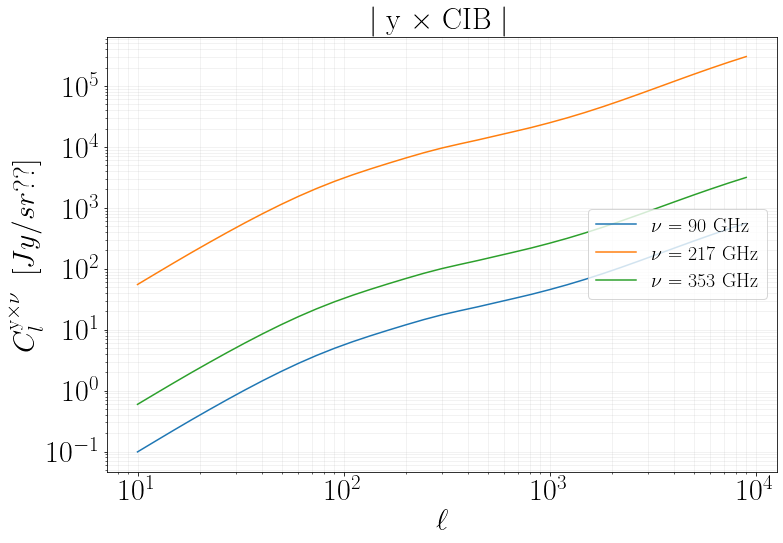

In [120]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\rm{ y \times \nu}} \,\,\, [Jy/sr ??]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r' $|$ y $\times$ CIB $|$', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")


for (i,nu) in enumerate(nu_list):
    cl_yCIB = cl_yCIB_at_nu_in_GHz(cl_tsz_cib[str(nu)], nu)
    #print(cl_yCIB['1h'])
    plt.plot(cl_yCIB['ell'], abs(np.asarray(cl_yCIB['1h'])+np.asarray(cl_yCIB['2h'])),'-',label=r'$\nu$ = %.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\rm{ y \times \nu}} \,\,\, [Jy/sr ??]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r' $|$ y $\times$ CIB $|$', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")


for (i,nu) in enumerate(nu_list):
    cl_yCIB = cl_yCIB_at_nu_in_GHz(cl_tsz_cib[str(nu)], nu)
    #print(cl_yCIB['1h'])
    plt.plot(cl_yCIB['ell'], abs(np.asarray(cl_yCIB['1h'])+np.asarray(cl_yCIB['2h'])),'-',label=r'$\nu$ = %.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

90
217
353


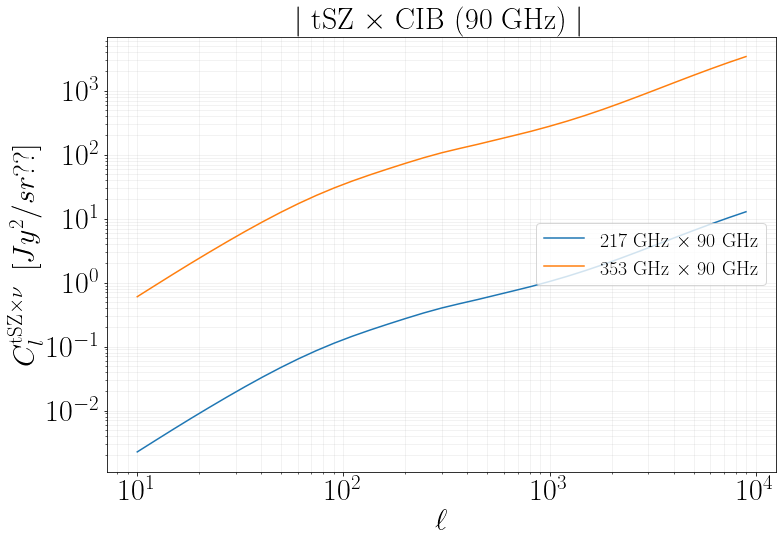

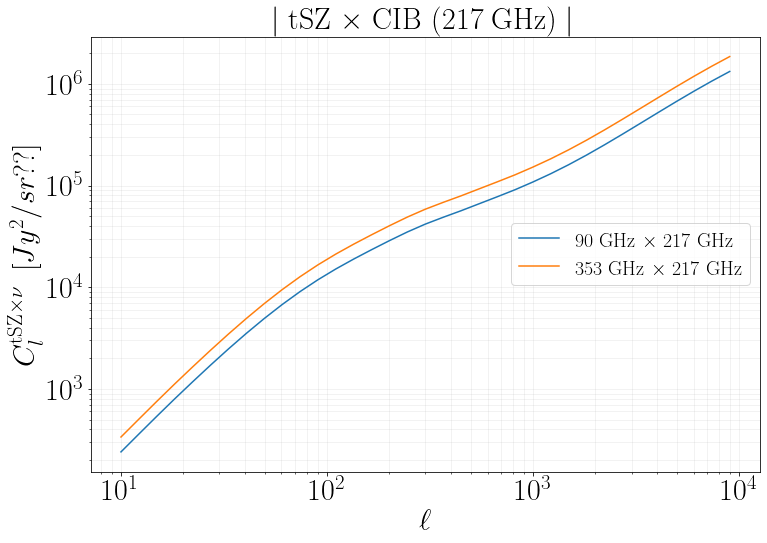

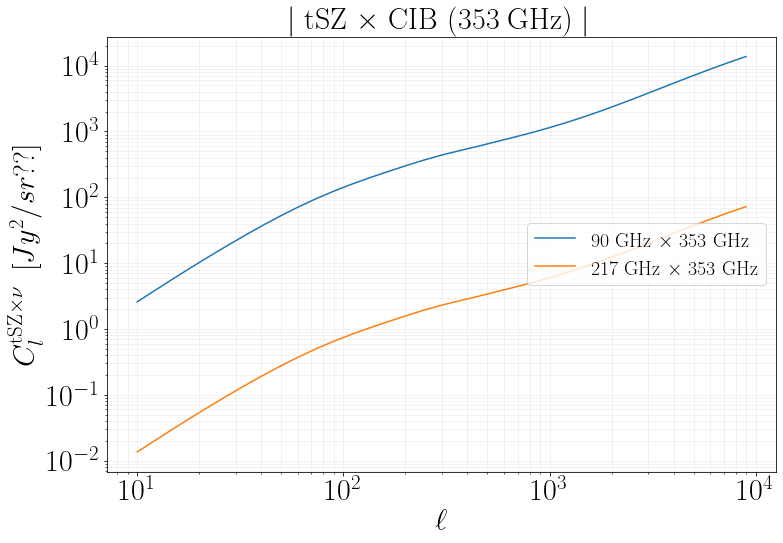

In [125]:



for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(12,8))
    plt.xlabel(r"$\ell$", size=30)
    plt.ylabel(r"$ C_l^{\rm{ tSZ \times \nu}} \,\,\, [Jy^2/sr ??]$", size=30)
    plt.yticks(fontsize=30)
    plt.xticks(fontsize=30)
    plt.title(r' $|$ tSZ $\times$ CIB (%.1i GHz) $|$'%(nu), fontsize=30)
    plt.grid(which='both',alpha=0.2)
    plt.yscale("log")
    plt.xscale("log")
    cl_yCIB = cl_yCIB_at_nu_in_GHz(cl_tsz_cib[str(nu)], nu)
    cl_yCIB_at_nu = np.asarray(cl_yCIB['1h'])+np.asarray(cl_yCIB['2h'])
    for (j,nu2) in enumerate(nu_list):
        if nu!=nu2:
            frequency_in_Hz= nu2*1e9
            gNU_tSZ = TCMB*((_h_P_*frequency_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*TCMB))/2.))-4.)
            plt.plot(cl_yCIB['ell'], abs(cl_yCIB_at_nu*gNU_tSZ),'-',label=r'%.1i GHz $\times$ %.1i GHz'%(nu2, nu))

    plt.legend(loc='right',  fontsize=20)    
  

In [ ]:
cib = convert_cib(143, cls_csz_1h+cls_csz_2h)

In [ ]:
cib

In [ ]:
from astropy import units as u
surf_brightness = (cls_csz_1h+cls_csz_2h)* u.MJy/u.sr
cib = surf_brightness.to(u.K, equivalencies=u.brightness_temperature(143*u.GHz)) 
cib 

In [ ]:
def fiona(nu_ghz):
    x = nu_ghz/56.233
    bn = 968* np.exp(x) *(nu_ghz/100)**4 / (np.exp(x)-1)**2
    return bn 
fiona(217)   

In [ ]:
np.exp()

In [ ]:
from astropy.cosmology import Planck15
freq = 143 * u.GHz

equiv = u.thermodynamic_temperature(freq, Planck15.Tcmb0)
(1. * u.mK).to(u.MJy / u.sr, equivalencies=equiv)  
#<Quantity 0.37993172 MJy / sr

In [ ]:
CIB = ((l_csz)*(l_csz+1)* (cls_csz_1h+cls_csz_2h)/2/np.pi * u.Jy / u.sr).to(u.mK, equivalencies=equiv)  
#<Quantity 0.37993172 MJy / sr